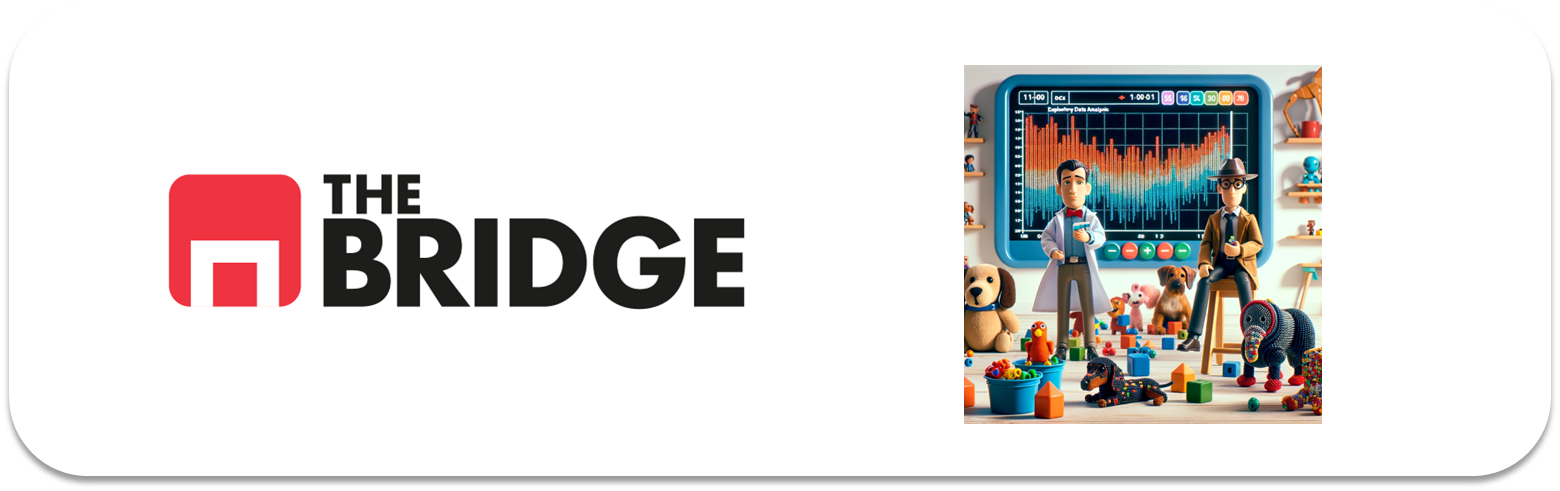

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [2]:

import pandas as pd
import seaborn as sns

from bootcampviztools import *
from scipy.stats import chi2_contingency, mannwhitneyu
import matplotlib.pyplot as plt


C:\Users\34632\AppData\Local\Temp\ipykernel_20720\719686648.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [3]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head(40)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [4]:
df_titanic.drop(columns=["deck","survived","pclass","embarked"], inplace= True)

In [5]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          714 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  889 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [6]:
df_titanic["family_members"] = df_titanic['parch'] + df_titanic['sibsp']
df_titanic = df_titanic.drop(["parch","sibsp"], axis = 1)

### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
df_titanic.loc[df_titanic['embark_town'].isna(), "embark_town"] = df_titanic['embark_town'].mode()[0]

In [7]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             714 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [8]:
df_titanic['age_who']=df_titanic.groupby('who')['age'].transform("mean")
df_titanic.head(20)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members,age_who
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1,33.173123
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1,32.000000
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0,32.000000
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1,32.000000
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0,33.173123
5,male,NaN,8.4583,Third,man,True,Queenstown,no,True,0,33.173123
6,male,54.0,51.8625,First,man,True,Southampton,no,True,0,33.173123
7,male,2.0,21.0750,Third,child,False,Southampton,no,False,4,6.369518
8,female,27.0,11.1333,Third,woman,False,Southampton,yes,False,2,32.000000
9,female,14.0,30.0708,Second,child,False,Cherbourg,yes,False,1,6.369518


In [9]:
df_titanic.loc[df_titanic['age'].isna(),"age"]=df_titanic.loc[df_titanic['age'].isna(),"age_who"]

In [10]:
df_titanic.drop("age_who",axis=1,inplace=True)

In [11]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     889 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


In [13]:
#df_titanic.drop('embarked',axis=1,inplace=True)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

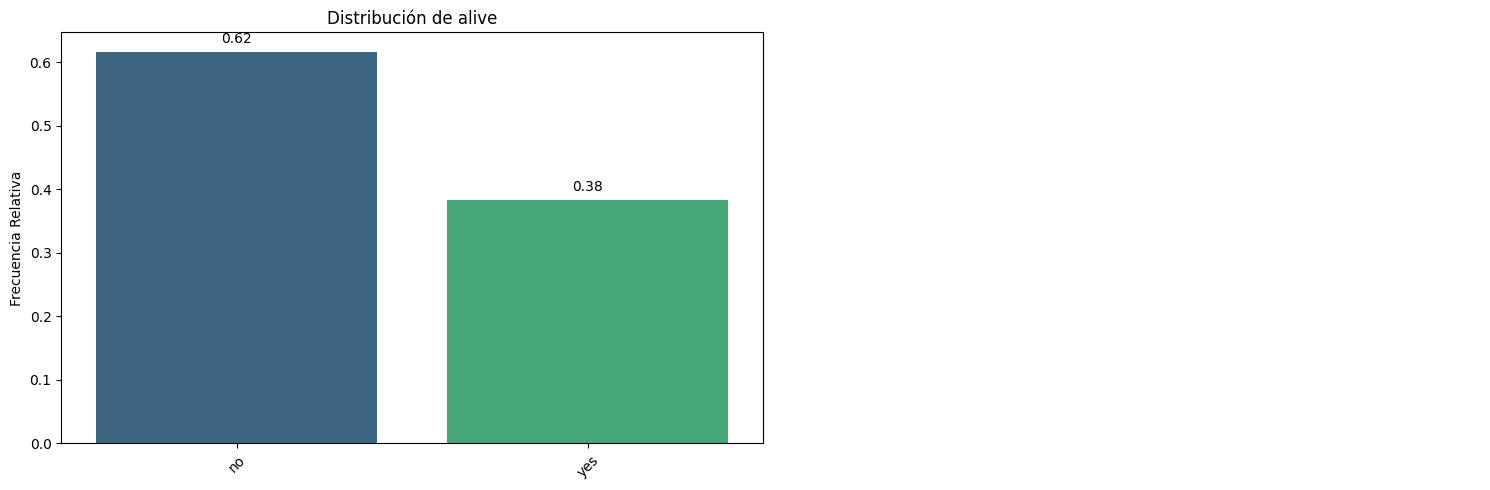

In [14]:
pinta_distribucion_categoricas(df_titanic,["alive"], relativa= True, mostrar_valores= True)

In [15]:
df_titanic.groupby(["alive","who"])[["age","fare"]].mean().round(1) #.sort_values('fare')

age  fare
alive who              
no    child   7.2  32.6
      man    33.0  21.5
      woman  30.9  21.0
yes   child   5.8  32.9
      man    33.9  42.1
      woman  32.4  54.8

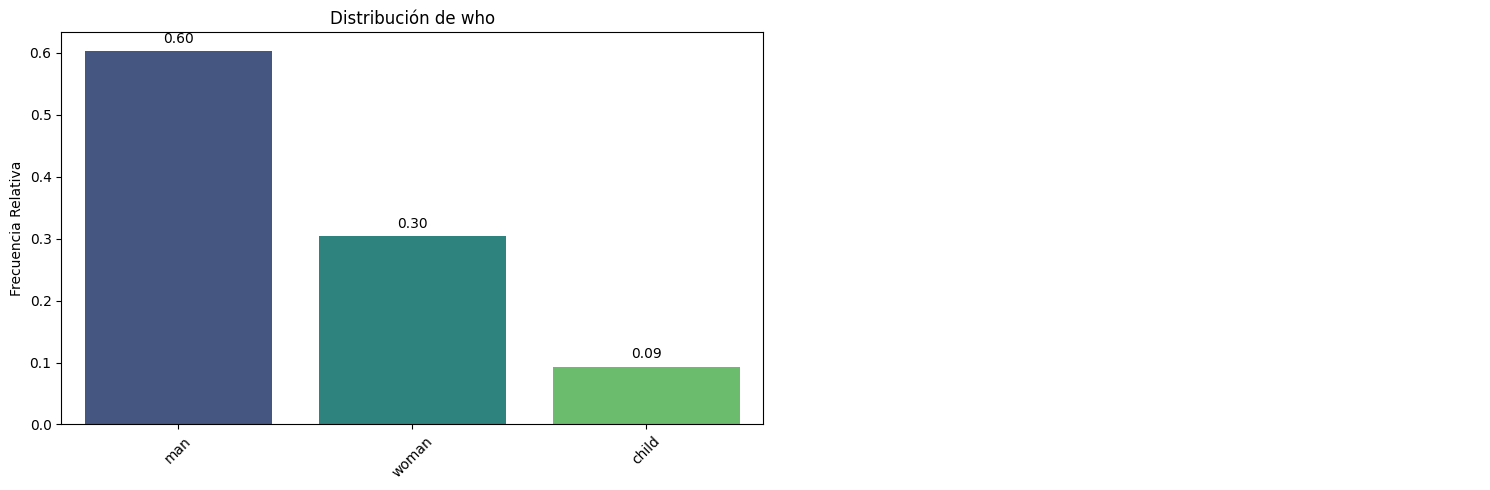

In [16]:
pinta_distribucion_categoricas(df_titanic,["who"], relativa= True, mostrar_valores= True)

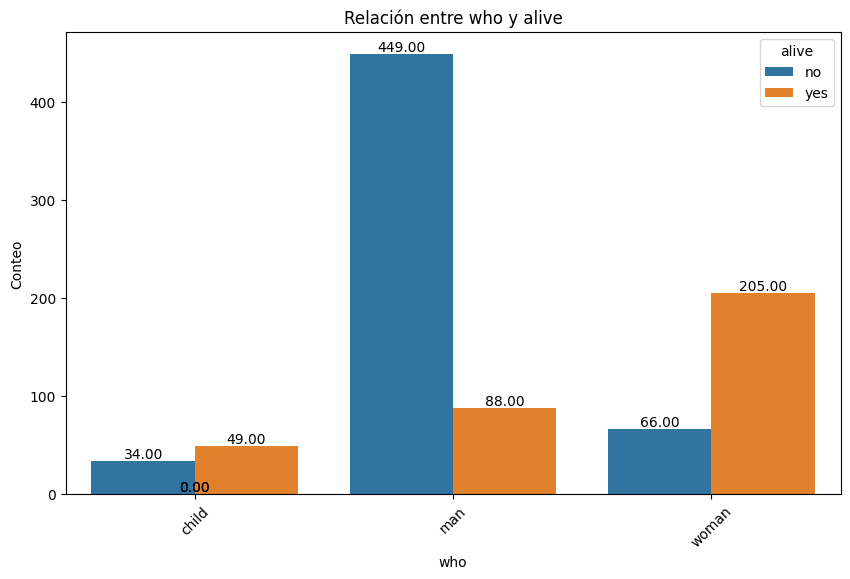

In [17]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True)

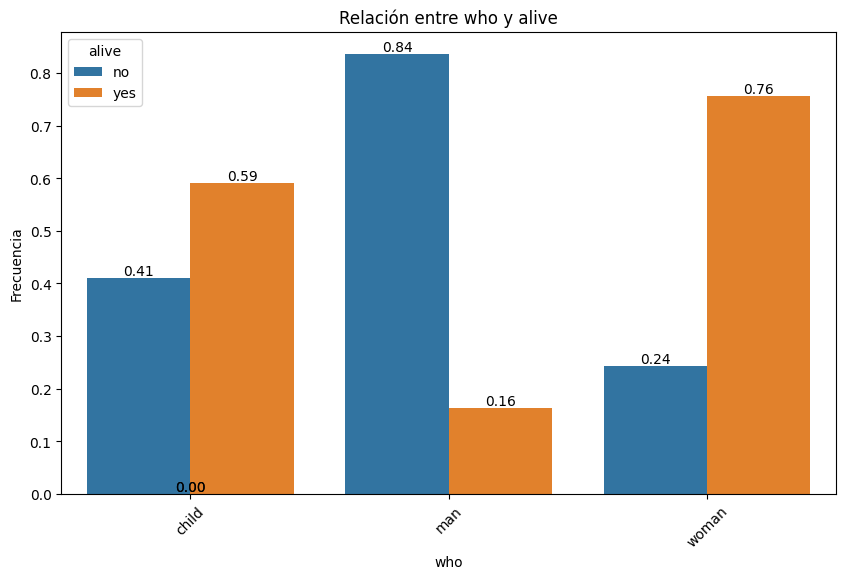

In [18]:
plot_categorical_relationship_fin(df_titanic, "who","alive", show_values= True,relative_freq=True)

In [19]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["who"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 283.923050324233
P-Value: 2.2227620817798914e-62
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 51.14141414 330.87878788 166.97979798]
 [ 31.85858586 206.12121212 104.02020202]]


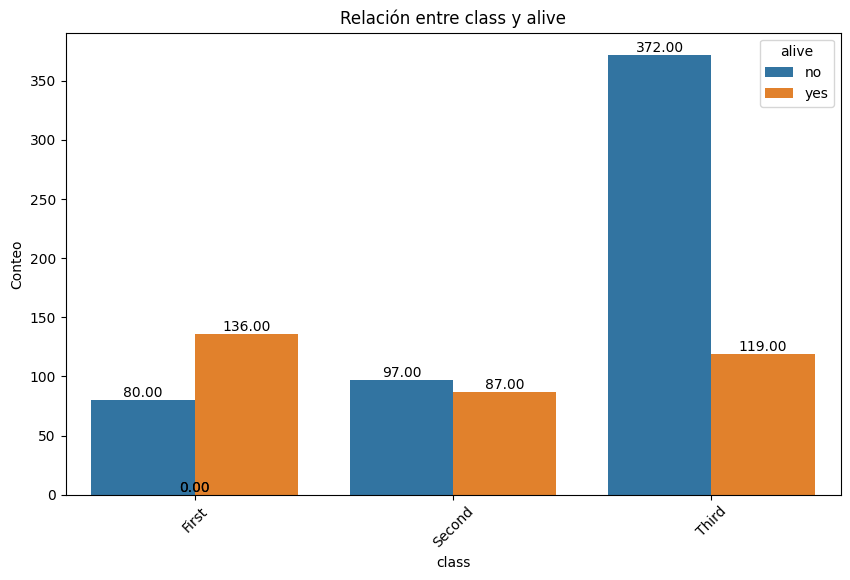

In [20]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True)

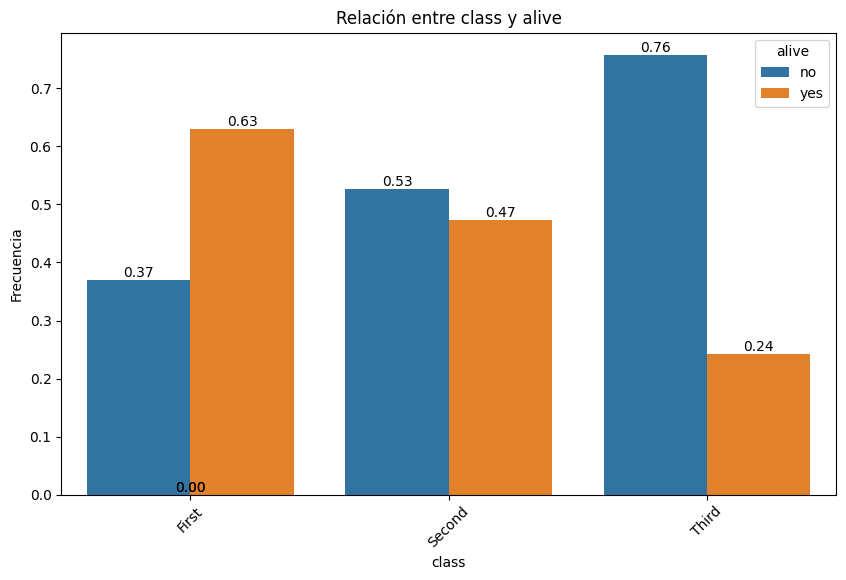

In [21]:
plot_categorical_relationship_fin(df_titanic, "class","alive", show_values = True,relative_freq=True)

In [22]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["class"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 102.88898875696056
P-Value: 4.549251711298793e-23
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[133.09090909 113.37373737 302.53535354]
 [ 82.90909091  70.62626263 188.46464646]]


Vamos a hacer un analisis "alive"-"who" para las siguientes clases:
['Third' 'First' 'Second']


Para clase:  Third


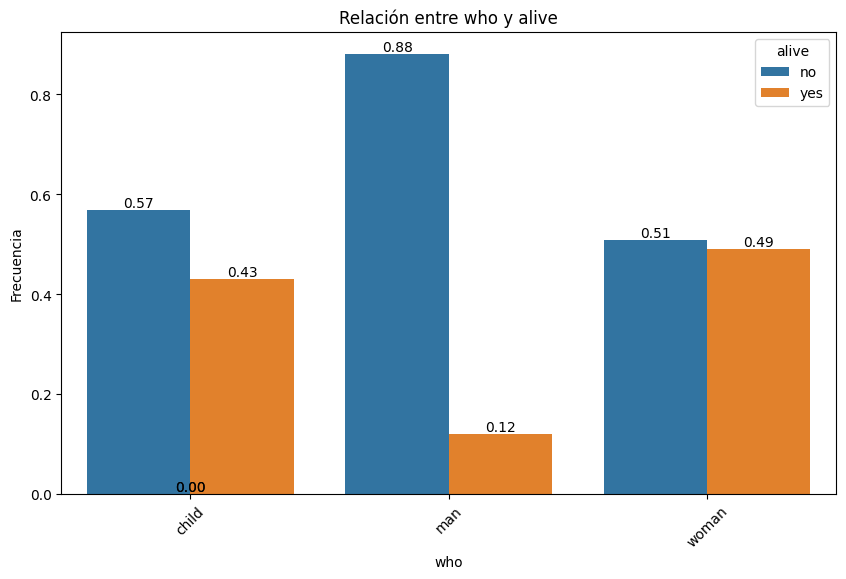

Para clase:  First


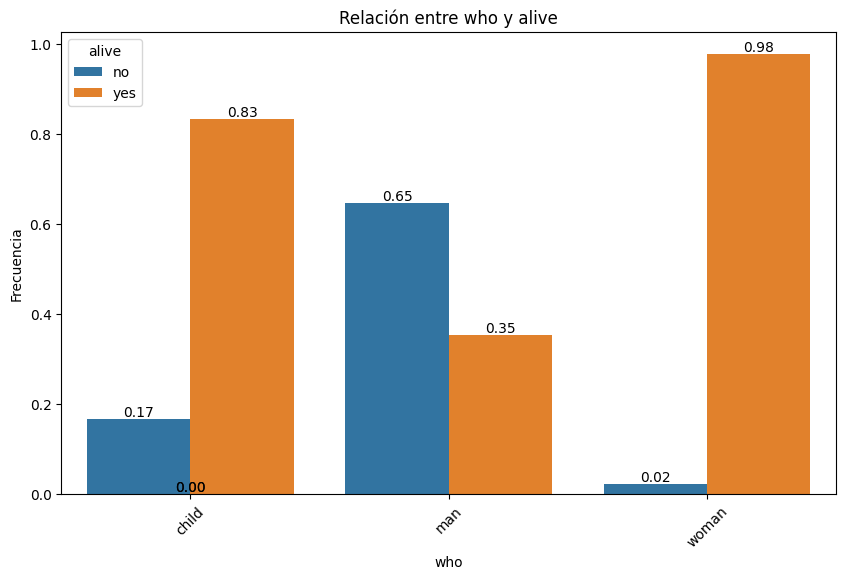

Para clase:  Second


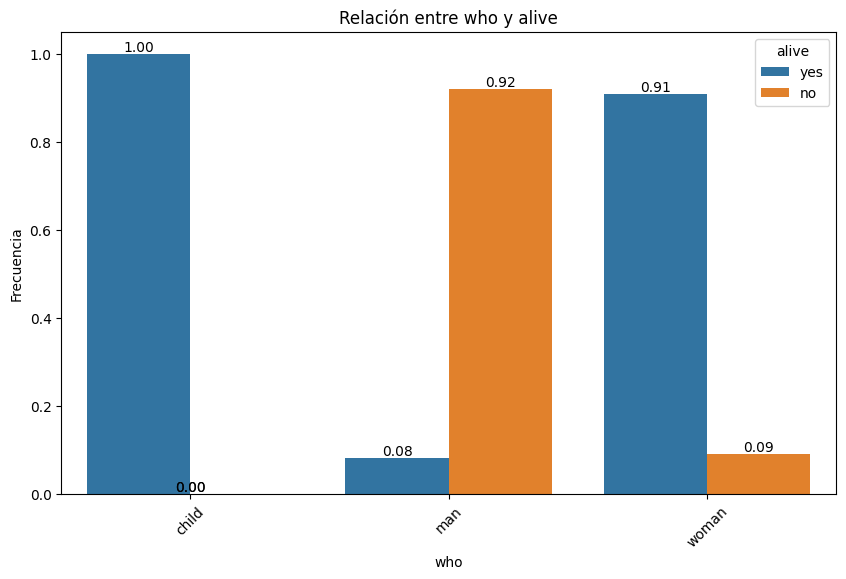

In [24]:
clases = df_titanic['class'].unique()
print(f'Vamos a hacer un analisis "alive"-"who" para las siguientes clases:')
print(clases)
print()
print()
for clase in clases:
    print('Para clase: ', clase)
    df_temp = df_titanic[df_titanic['class'] == clase]
    plot_categorical_relationship_fin(df_temp,'who','alive', relative_freq=True, show_values=True)

* En términos absolutos murieron muchos más hombres que cualquiera de los otros dos grupos
* En términos relativos, también la mortalidad fue superior: 84% en hombres, 41% en niños y 24% en mujeres.

* El test chi2 nos dice que debemos rechazar la hipótesis nula: daba igual ser hombre mujer o niño en cuanto a expectativas de supervivencia. Es lo contrario.
* Pero otro dato interesante y que hemos explorado en el trivariante es el hecho de que el grupo de los niños sufrió una mortalidad más del doble que el de las mujeres. *Mujeres y niños primero*. Sí, pero teniendo en cuenta la clase en la que viajaban. La explicación final es que había muchas en primera clase.


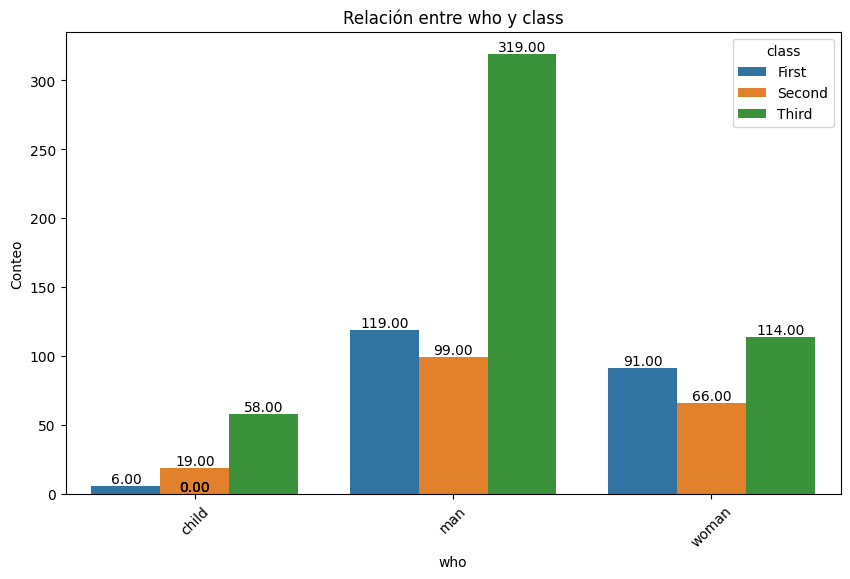

In [26]:
plot_categorical_relationship_fin(df_titanic,"who","class", relative_freq= False, show_values= True)

* La explicación de la supervivencia está en la combinación de factores who y class, de momento.
* Las mujeres y niños sobrevivieron más en general.
* Además, había muchos más niños en tercera que mujeres en tercera proprocionalmente. Por eso sobrevivieron más mujeres, porque iban en primera.

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

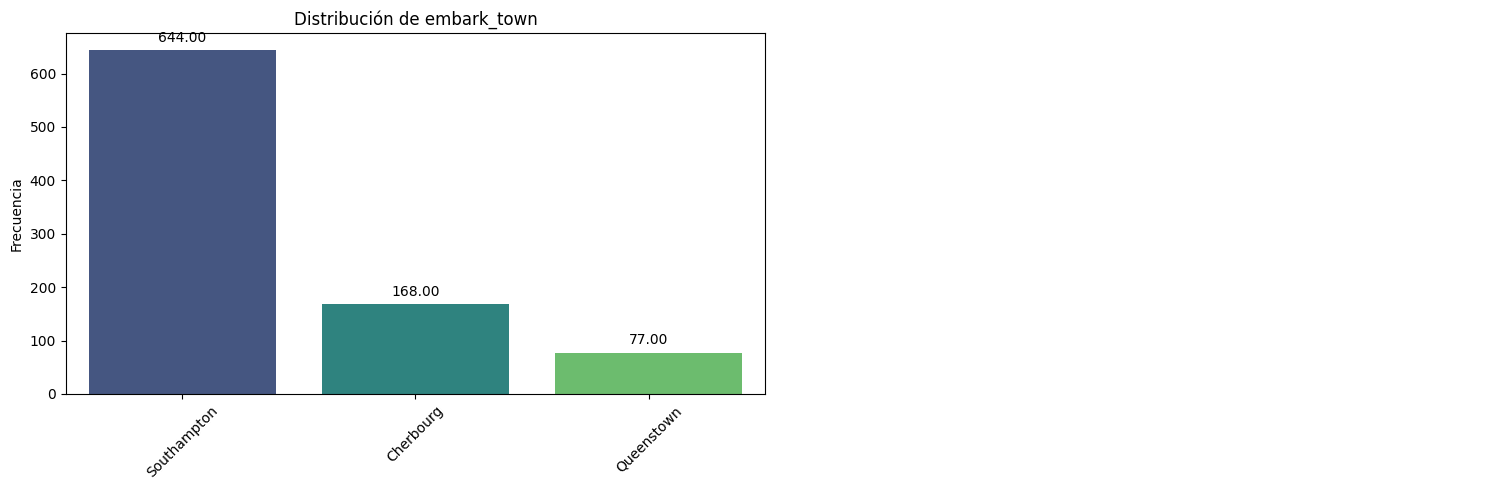

In [32]:
pinta_distribucion_categoricas(df_titanic,['embark_town'],mostrar_valores=True)

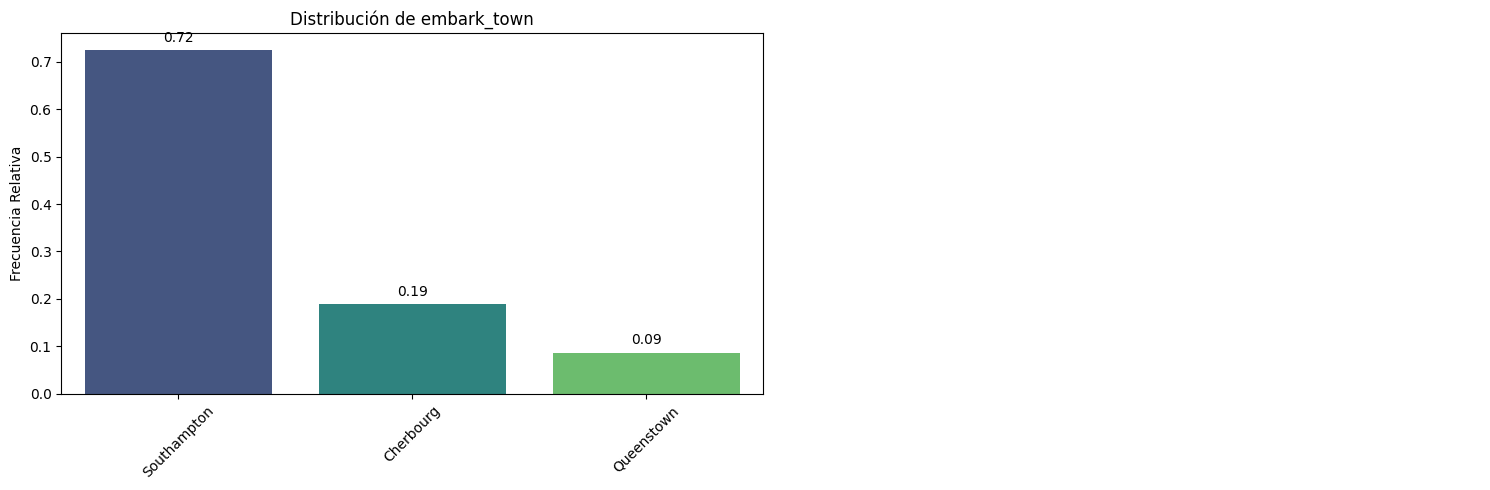

In [31]:
pinta_distribucion_categoricas(df_titanic,['embark_town'],relativa=True,mostrar_valores=True)

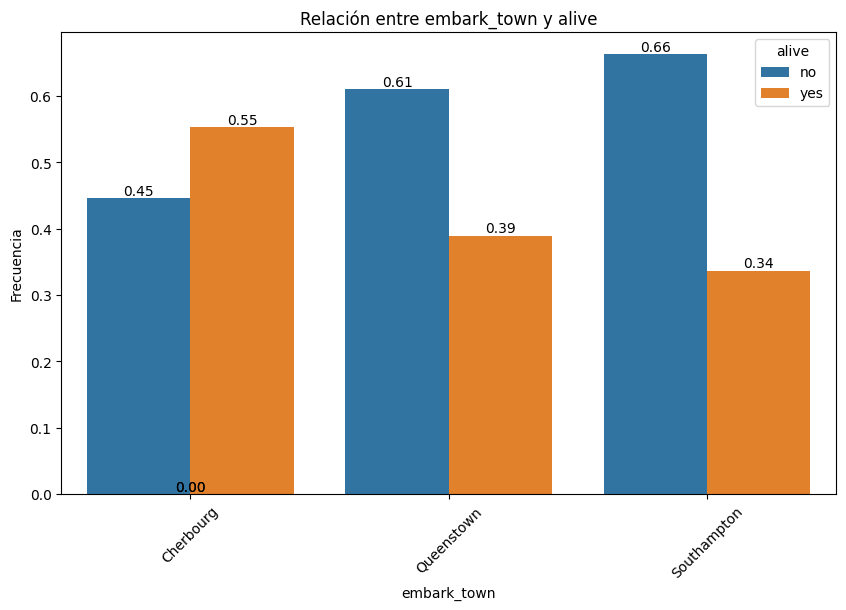

In [33]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True,relative_freq=True)

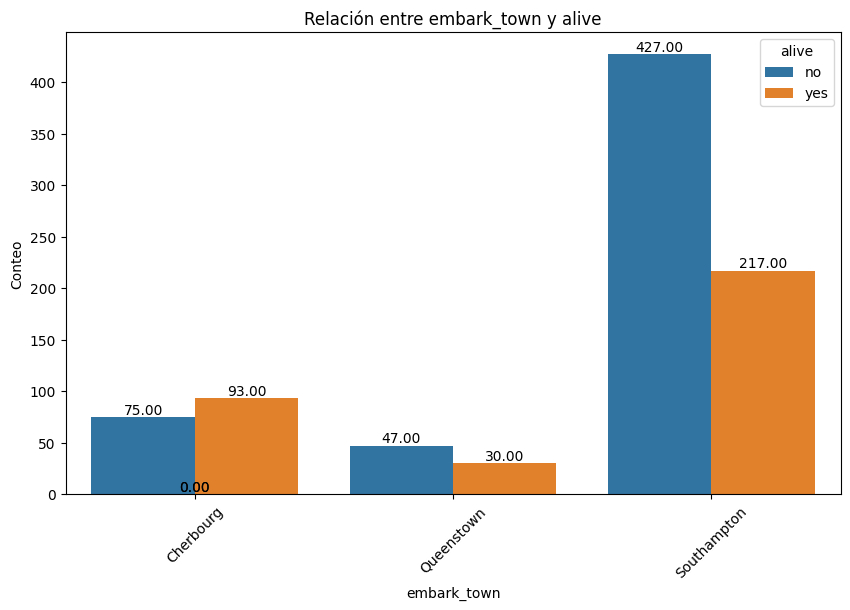

In [34]:
plot_categorical_relationship_fin(df_titanic, "embark_town","alive", show_values= True)

In [36]:
df_titanic.groupby('embark_town',as_index=False)['alive'].value_counts(normalize=True)

,embark_town,alive,proportion
0,Cherbourg,yes,0.553571
1,Cherbourg,no,0.446429
2,Queenstown,no,0.610390
3,Queenstown,yes,0.389610
4,Southampton,no,0.663043
5,Southampton,yes,0.336957


In [37]:

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


* ATENCIÓN: Sobrevivieron más en términos absolutos entre los que embarcaron en Southampton que los que lo hicieron en el resto de puertos!!!
* El test Chi-2 nos confirma que el puerto en el que embarcaron influyó en si sobrevivieron o no.
* ¿Puede que algunos puertos tengan mal de ojo?
* O puede ser que este sesgo (diferencia) venga motivado por otros factores, como que embarcaron más hombres en Southampton o más gente en tercera clase
* Lo comprobamos.

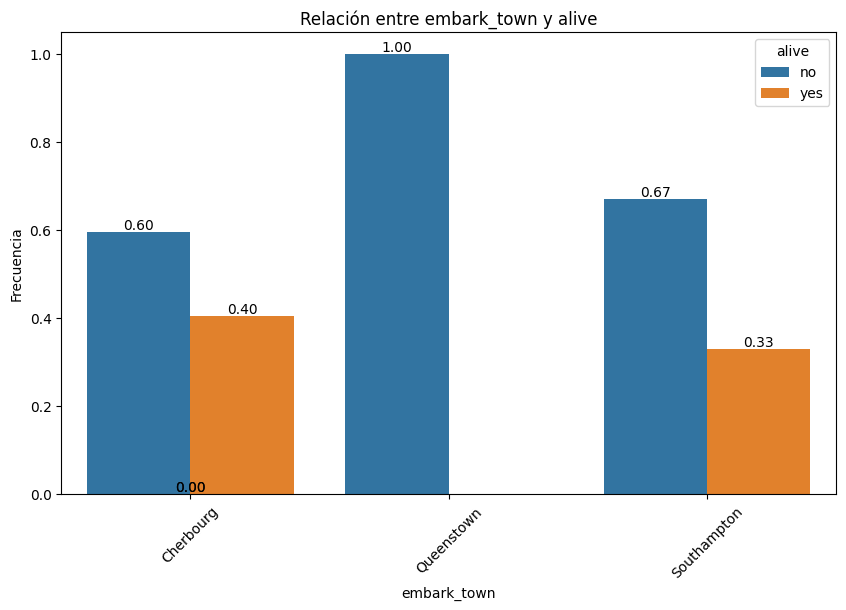

In [38]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "First")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas
plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)
#plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

In [39]:
tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 1.2309087111718686
P-Value: 0.5403953078947801
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[27.17647059  0.64705882 49.17647059]
 [14.82352941  0.35294118 26.82352941]]


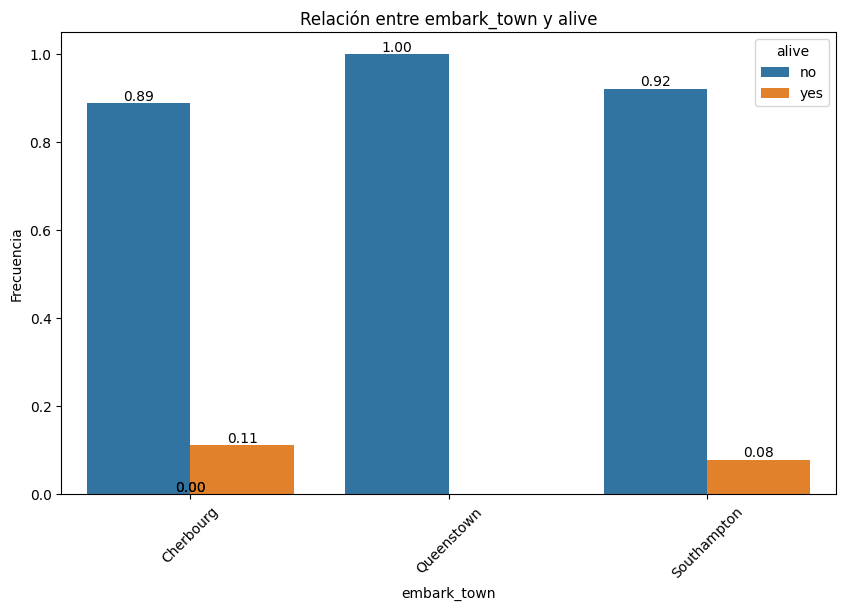

Valor Chi-Cuadrado: 0.20474749969131997
P-Value: 0.9026921075770808
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[8.27272727e+00 9.19191919e-01 8.18080808e+01]
 [7.27272727e-01 8.08080808e-02 7.19191919e+00]]


In [40]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Second")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

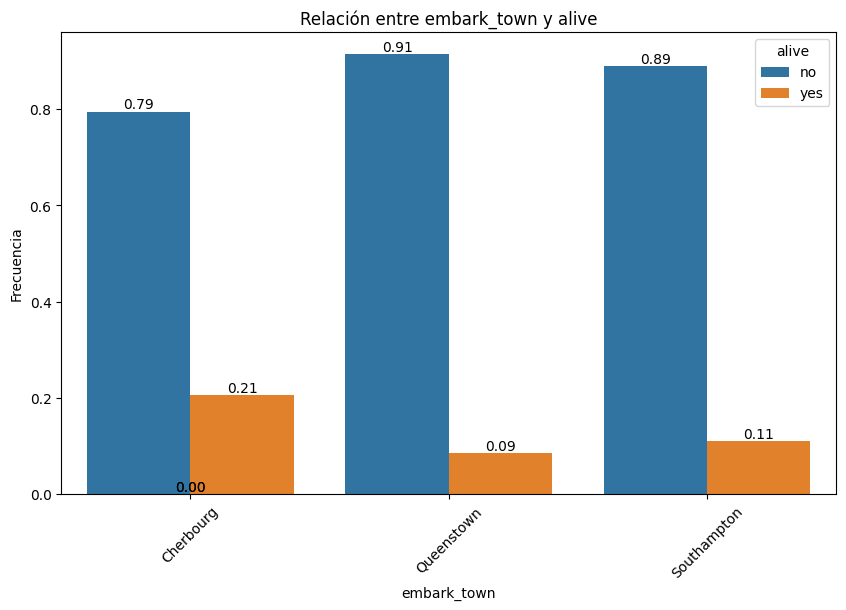

Valor Chi-Cuadrado: 3.3072128132305267
P-Value: 0.1913585459765817
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 34.35423197  30.830721   215.81504702]
 [  4.64576803   4.169279    29.18495298]]


In [41]:
df_test = df_titanic.loc[(df_titanic.who == "man") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

### Haríamos lo mismo para todas las combinaciones de who y de class: 9 tablas de contingencia, menos las 3 que ya hemos hecho para hombres en cualquier clase.
#### Por motivos de espacio y tiempo, a continuación se muestran sólo las combinaciones para las que no se puede rechazar la hipótesis nula de que embark_town no influye en alive.
#### Es decir, os mostramos las gráficas y la chi-2 de lo que sorprende, de que el puerto de embarque tenga una influencia remanente sobre la supervivencia.

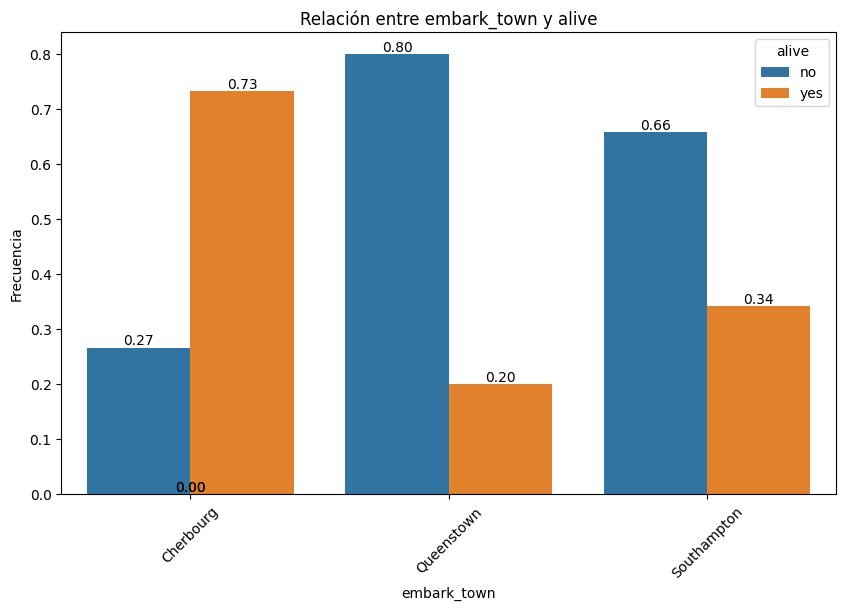

Valor Chi-Cuadrado: 7.903047315257843
P-Value: 0.019225386540995867
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 8.53448276  2.84482759 21.62068966]
 [ 6.46551724  2.15517241 16.37931034]]


In [42]:
df_test = df_titanic.loc[(df_titanic.who == "child") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

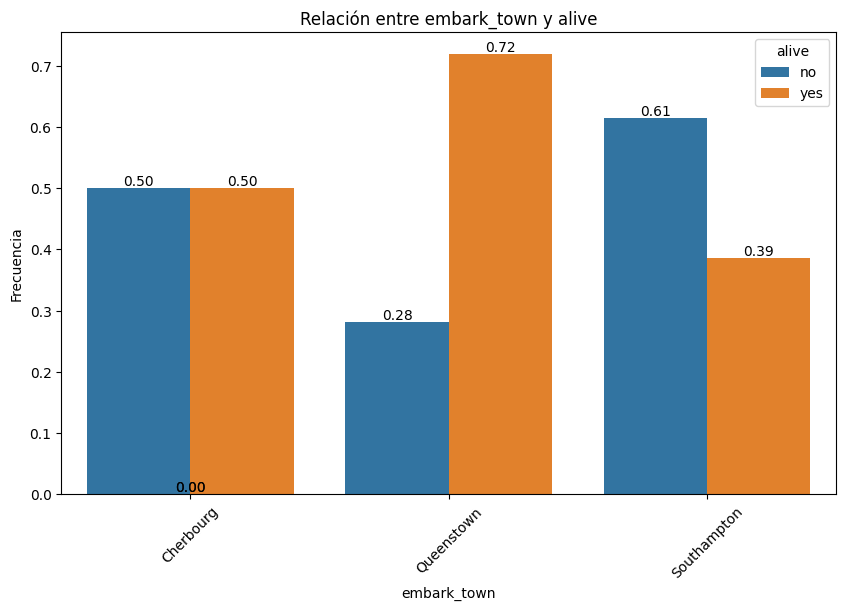

Valor Chi-Cuadrado: 9.750056078465867
P-Value: 0.007634880139676012
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[ 6.10526316 16.28070175 35.61403509]
 [ 5.89473684 15.71929825 34.38596491]]


In [43]:
df_test = df_titanic.loc[(df_titanic.who == "woman") & (df_titanic["class"] == "Third")].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_test,"embark_town","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_test["alive"],df_test["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

* Hemos explicado la dependencia aparente entre embark town y supervivencia controlando por clase y who. Para 7 de las 9 combinaciones, el chi-2 nos dice que embark_town no tiene influencia sobre alive.
* Sin embargo, para los grupos de mujeres y de niños de tercera clase, sí queda una dependencia entre embark_town y alive. 
* A estudiar más a fondo en un EDA. 
* Nuevas hipotesis.
* Controlar por otros factores y repetir. 
* Al final, puede que no lo consigamos explicar. Tal vez la explicación estaba en la variable "deck" que hemos eliminado.

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?


(2,)


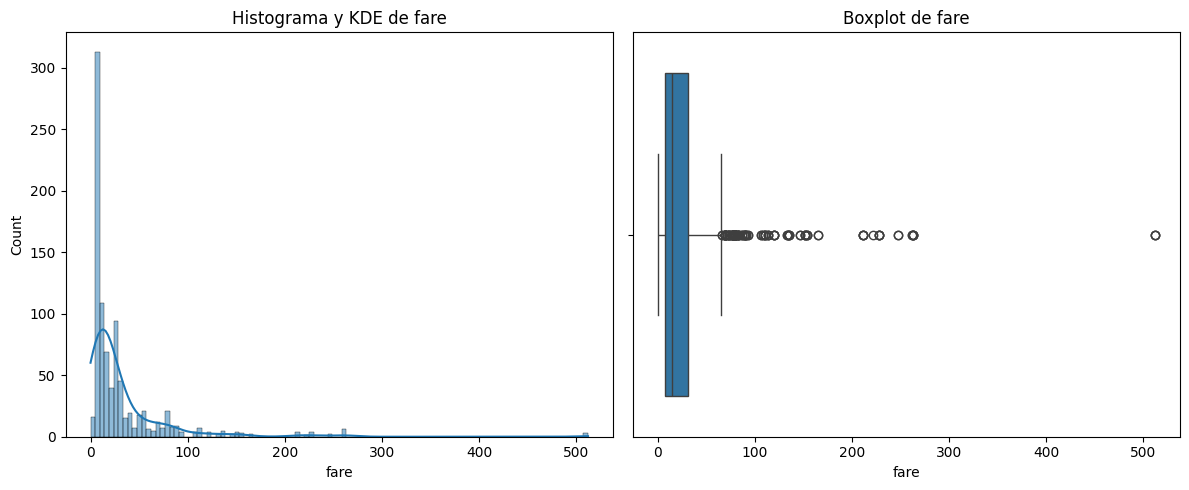

In [44]:
plot_combined_graphs(df_titanic,['fare'])

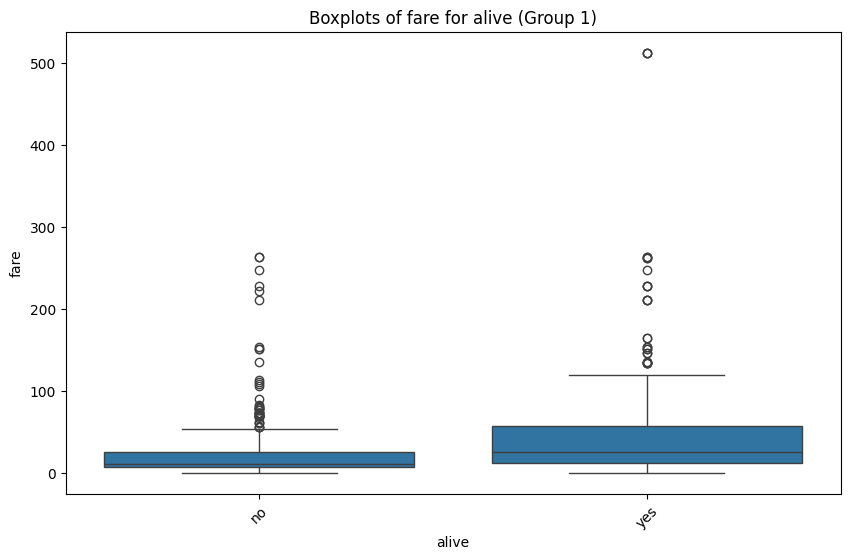

In [45]:
plot_grouped_boxplots(df_titanic,"alive","fare")

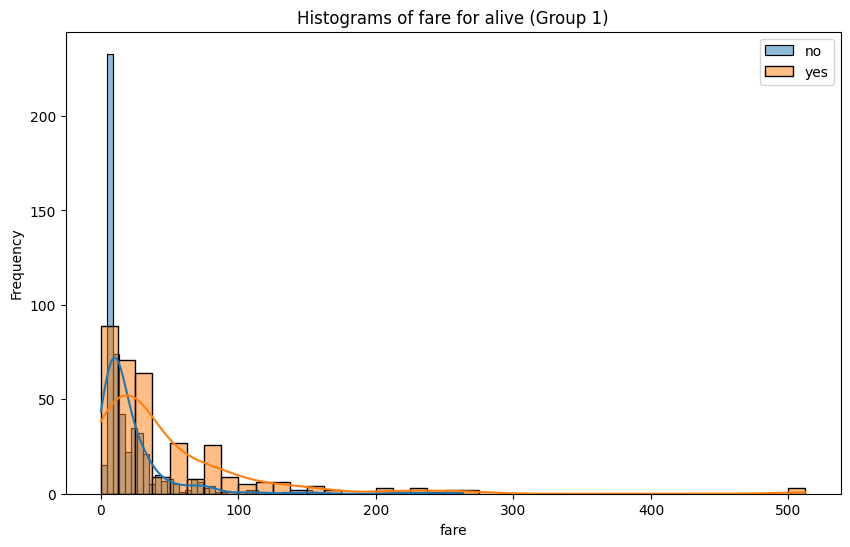

In [46]:
plot_grouped_histograms(df_titanic, "alive","fare", group_size = 2)

In [47]:
grupo_a = df_titanic.loc[df_titanic.alive == "yes"]["fare"]
grupo_b = df_titanic.loc[df_titanic.alive == "no"]["fare"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 129951.5
Valor p: 4.553477179250237e-22


* Visualmente parece que si hay influencia
* El test U de Mann-Whitney nos dice que sí hay relación
* Seguramente está relacionado con la clase

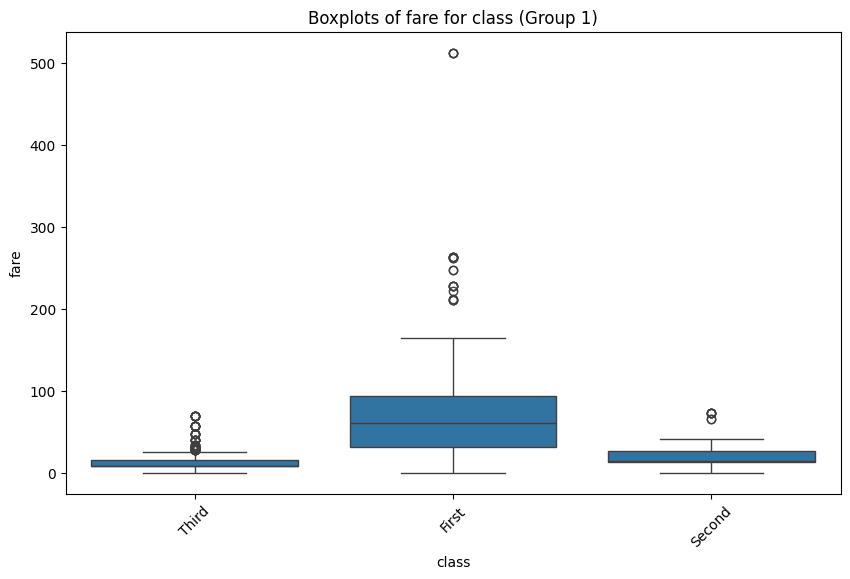

In [48]:
plot_grouped_boxplots(df_titanic,"class","fare")

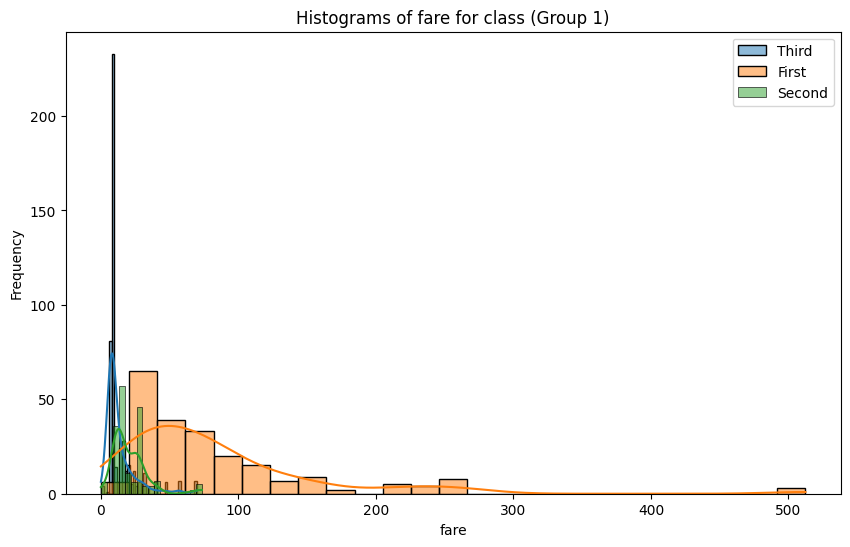

In [49]:
plot_grouped_histograms(df_titanic,"class","fare", group_size = 3)

* El histograma comparado de precios y clases, da que pensar en si se podría hacer un bin en fare
* Si existiese relevancia estadística con el fare (binned) podríamos decir que el precio es lo que salvó, independientemente de la clase
* Si se diera este caso, tendríamos que concluir: no era la clase sino el precio el que te daba mejor cabina

### Ahora hacemos dos grupos para estudiar sus características. En este caso "Fare". 

In [50]:
df_alive = df_titanic.loc[df_titanic.alive == "yes"].copy()
df_dead = df_titanic.loc[df_titanic.alive == "no"].copy()

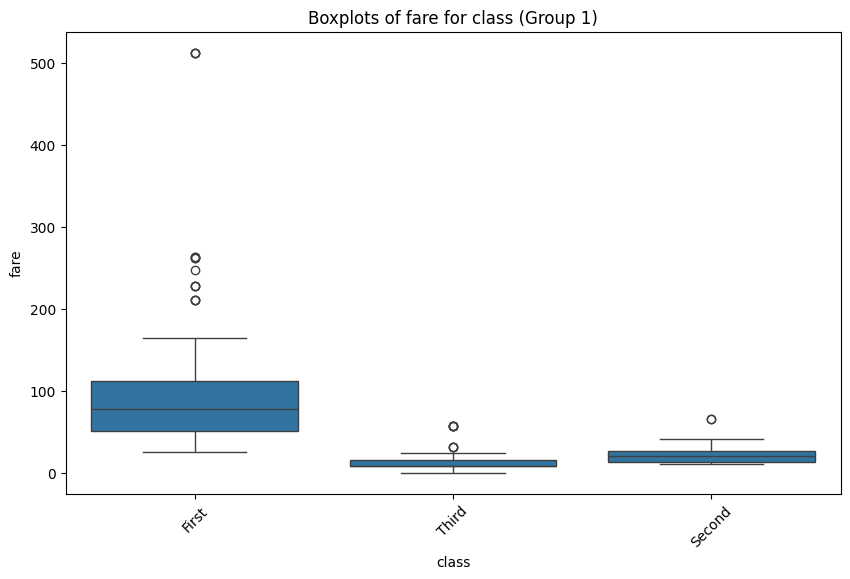

In [52]:
plot_grouped_boxplots(df_alive,"class","fare")

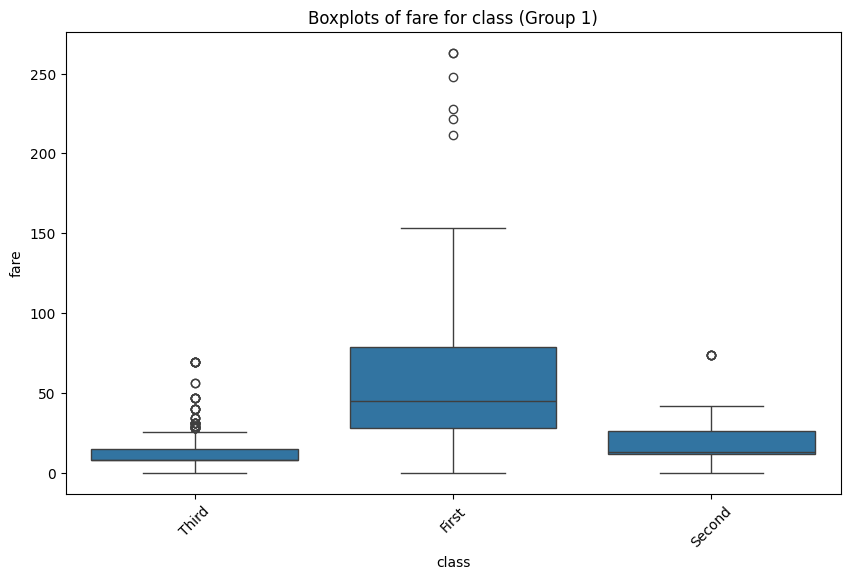

In [53]:
plot_grouped_boxplots(df_dead,"class","fare")

* CONCLUSIONES: El precio influyó en la supervivencia. 

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?


In [54]:
df_titanic.loc[df_titanic.fare == 0]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
179,male,36.000000,0.0,Third,man,True,Southampton,no,True,0
263,male,40.000000,0.0,First,man,True,Southampton,no,True,0
271,male,25.000000,0.0,Third,man,True,Southampton,yes,True,0
277,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
302,male,19.000000,0.0,Third,man,True,Southampton,no,True,0
413,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
466,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
481,male,33.173123,0.0,Second,man,True,Southampton,no,True,0
597,male,49.000000,0.0,Third,man,True,Southampton,no,True,0
633,male,33.173123,0.0,First,man,True,Southampton,no,True,0


In [55]:
df_titanic.loc[df_titanic.fare == 0].count()

sex               15
age               15
fare              15
class             15
who               15
adult_male        15
embark_town       15
alive             15
alone             15
family_members    15
dtype: int64

In [56]:
df_titanic.loc[df_titanic.fare == 0 ,'class'].value_counts()

class
Second    6
First     5
Third     4
Name: count, dtype: int64

In [57]:
df_titanic.loc[df_titanic.fare == df_titanic.fare.max()]

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.


In [62]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        plot_grouped_boxplots(df_datos,col_1,col_2)

Respuesta Southampton:


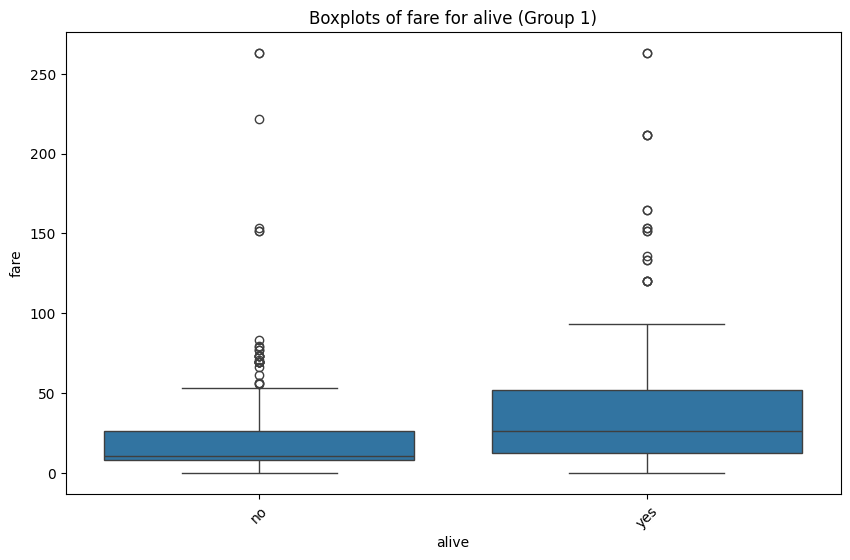

Respuesta Cherbourg:


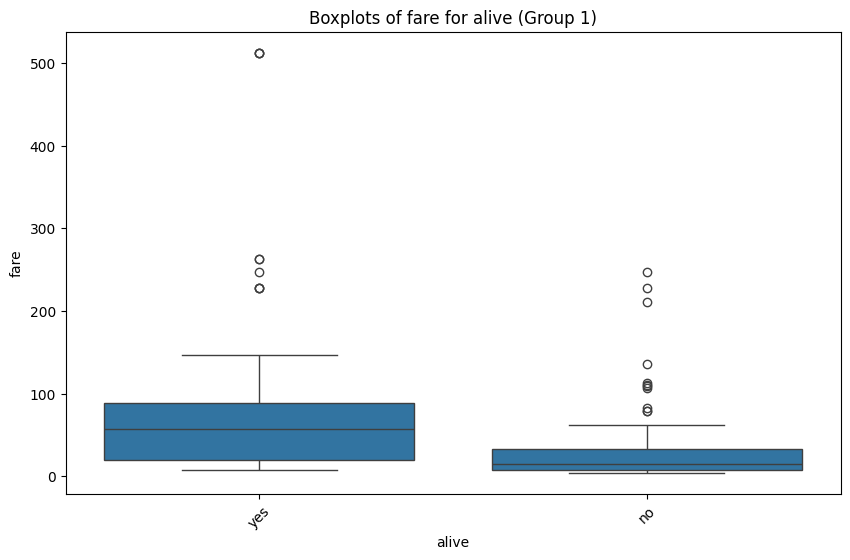

Respuesta Queenstown:


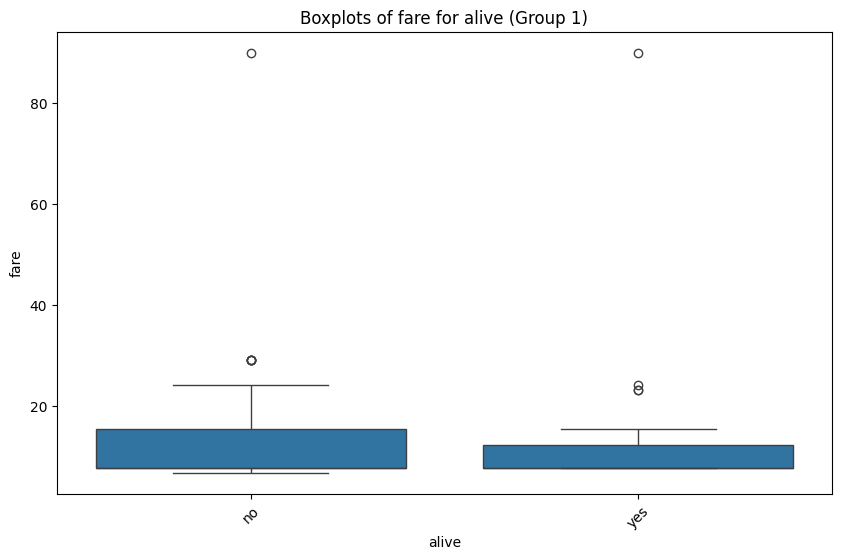

Respuesta nan:


In [63]:
trivariant_analysis(df_titanic, "embark_town","alive","fare", 2, 30)

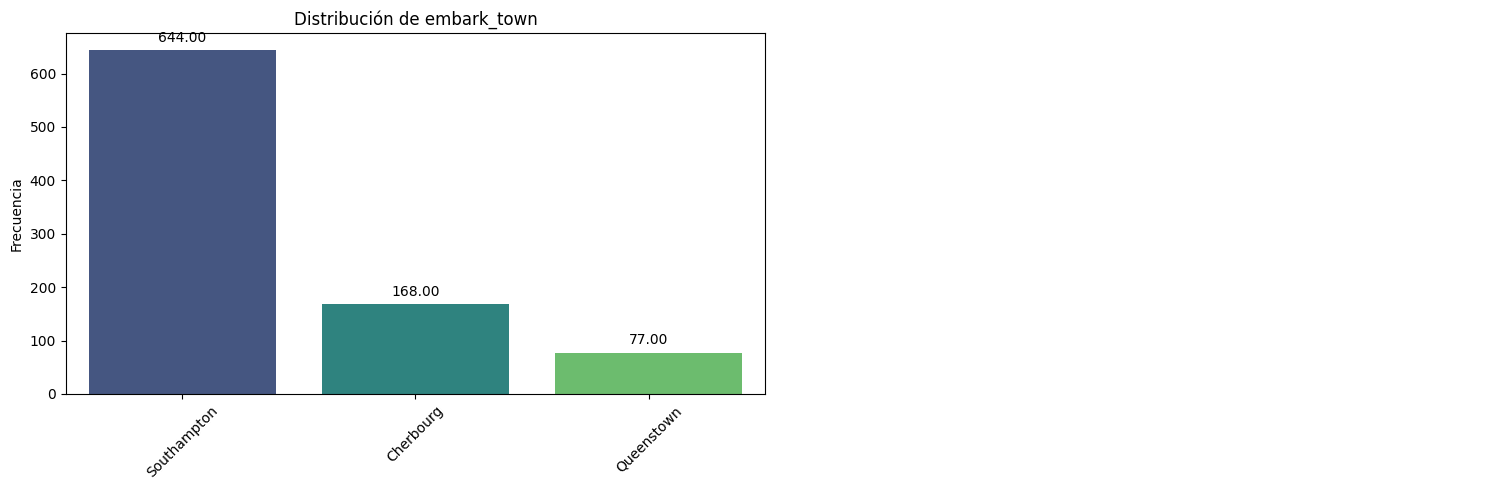

In [67]:
pinta_distribucion_categoricas(df_titanic,['embark_town'],relativa=False, mostrar_valores=True)

In [68]:
import math
math.sqrt(77)/77*100

11.396057645963795

In [69]:
math.sqrt(644)/644 *100

3.940552031195503

### Tendría sentido categorizar fare en 4 o 5 categorías y hacer el análsis entre las dos categóricas: fare_cat y alive.

### ¿Qué ocurre con la edad? Tiene influencia sobre la supervivencia. Vamos a estudiarlo segmentando la variable age en age_cat.

(2,)


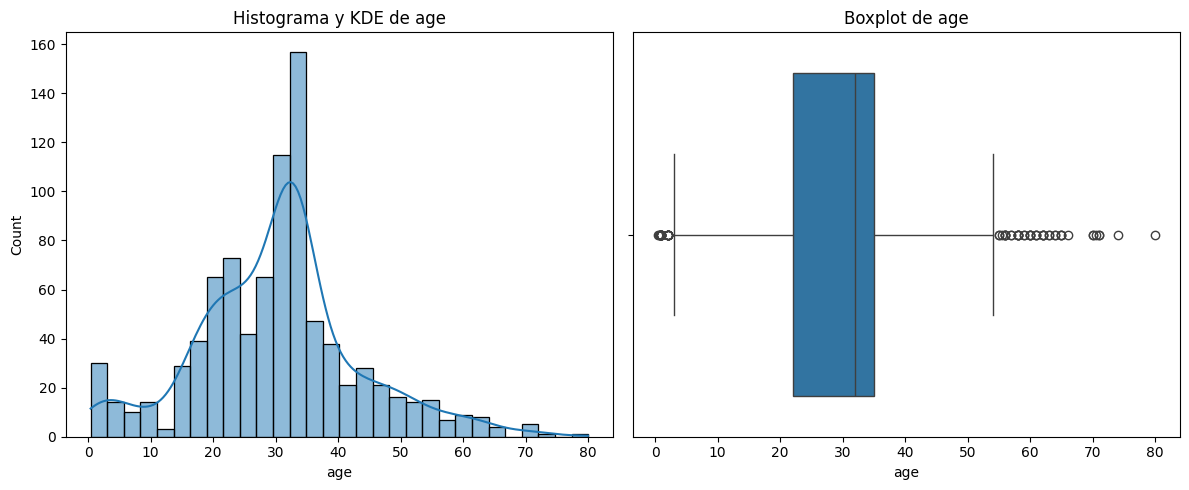

In [70]:
plot_combined_graphs(df_titanic,["age"])

In [71]:
df_titanic.age.describe()

count    891.000000
mean      30.319458
std       13.063839
min        0.420000
25%       22.000000
50%       32.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [72]:
bins = [0,22,32,35,80]
df_titanic["cat_age"] = pd.cut(df_titanic.age, bins = bins, labels = ["age_1","age_2","age_3","age_4"])

Para intervalo de edad age_1


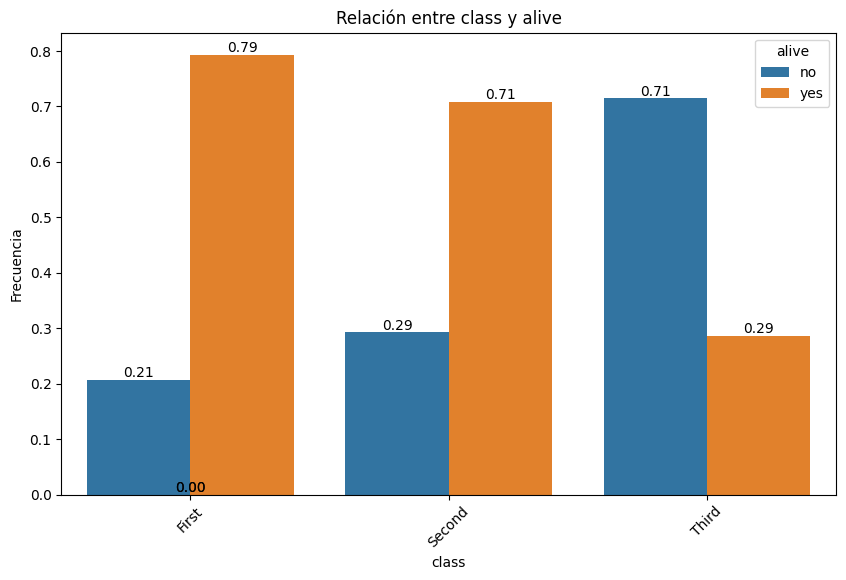

Para intervalo de edad age_2


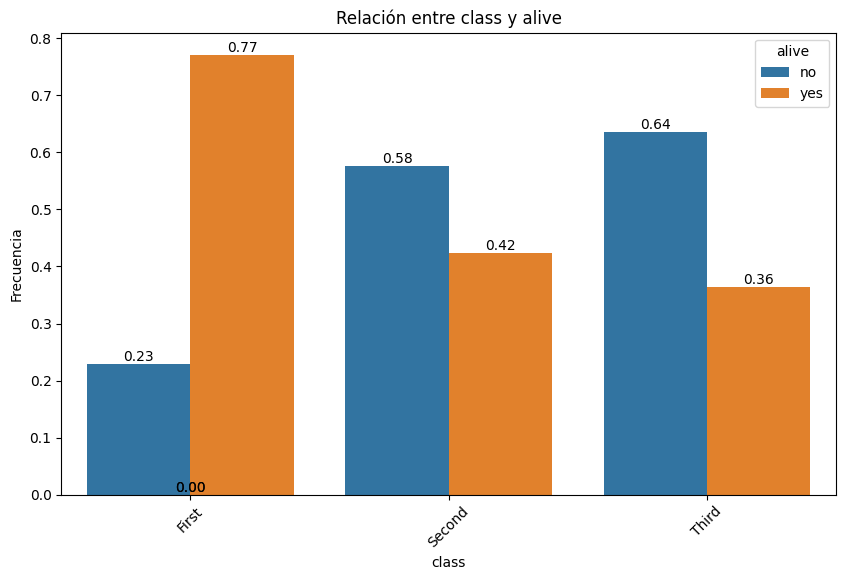

Para intervalo de edad age_3


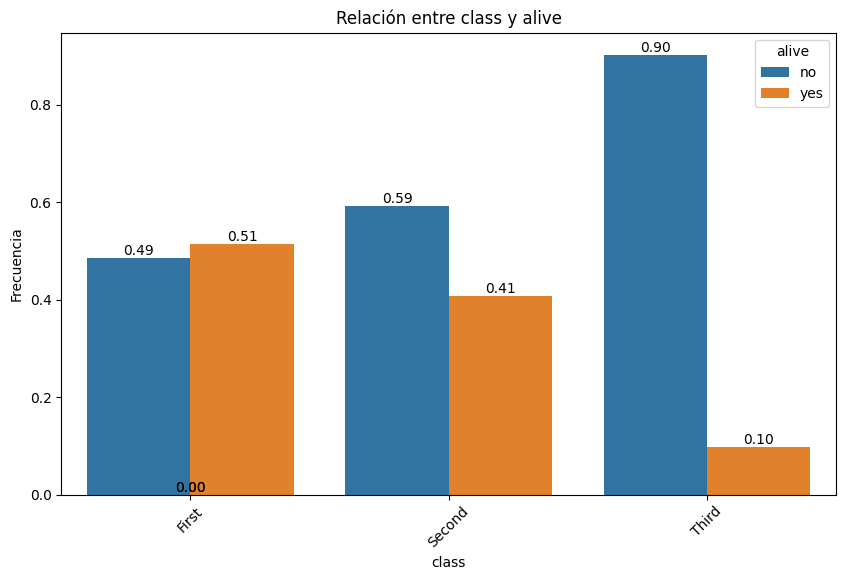

Para intervalo de edad age_4


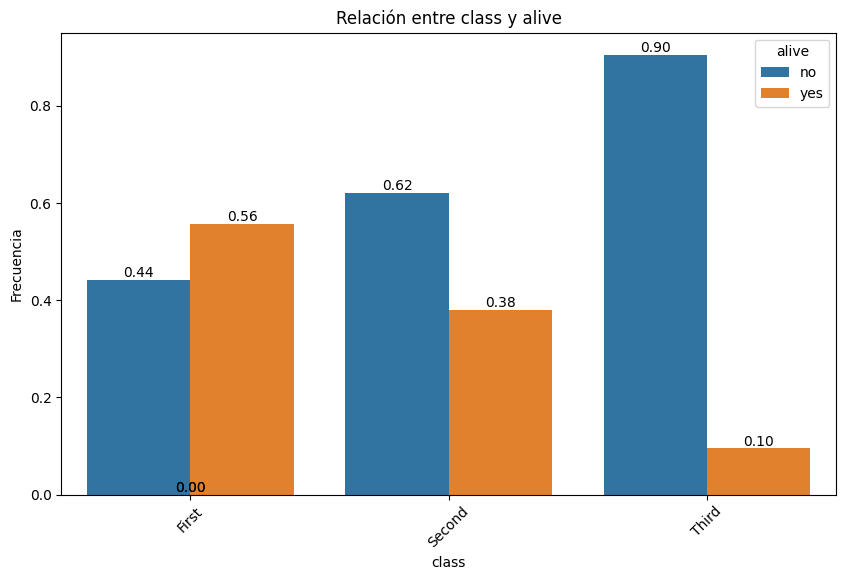

In [73]:
for bin in ['age_1','age_2','age_3','age_4']:
    df_temp = df_titanic[df_titanic['cat_age']== bin ]
    print('Para intervalo de edad',bin)
    plot_categorical_relationship_fin(df_temp,'class','alive',show_values=True,relative_freq=True)

c:\Users\34632\TheBridge\Feb24_repos\DS_Online_Feb24_Solutions_r\SPRINT7\Unidad_02\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


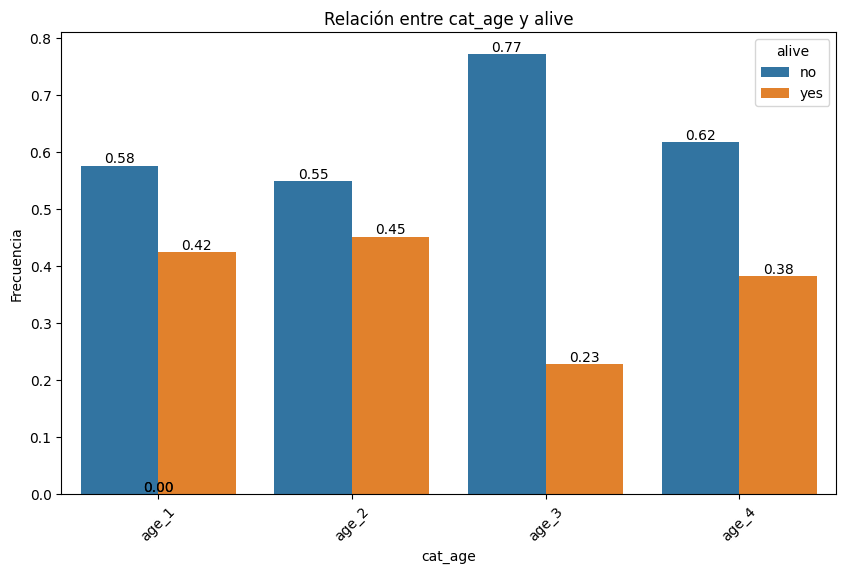

Valor Chi-Cuadrado: 26.48914983923762
P-Value: 1.769922284120912e-06
Grados de Libertad: 2
Tabla de Frecuencias Esperadas:
 [[103.7480315  47.5511811 397.7007874]
 [ 64.2519685  29.4488189 246.2992126]]


In [74]:
#df_test = df_titanic.loc[(df_titan].copy() # Fijo clase y who, si realmente hay dependencia por otros factores entre ciudad y sobrevivir, debería salir en los test y en las gráficas

plot_categorical_relationship_fin(df_titanic,"cat_age","alive", relative_freq= True, show_values= True)

tabla_contingencia = pd.crosstab(df_titanic["alive"],df_titanic["embark_town"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

### Concluimos que la edad tuvo un peso en la supervivencia. Más mayor, más mortalidad.

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Para alive? yes


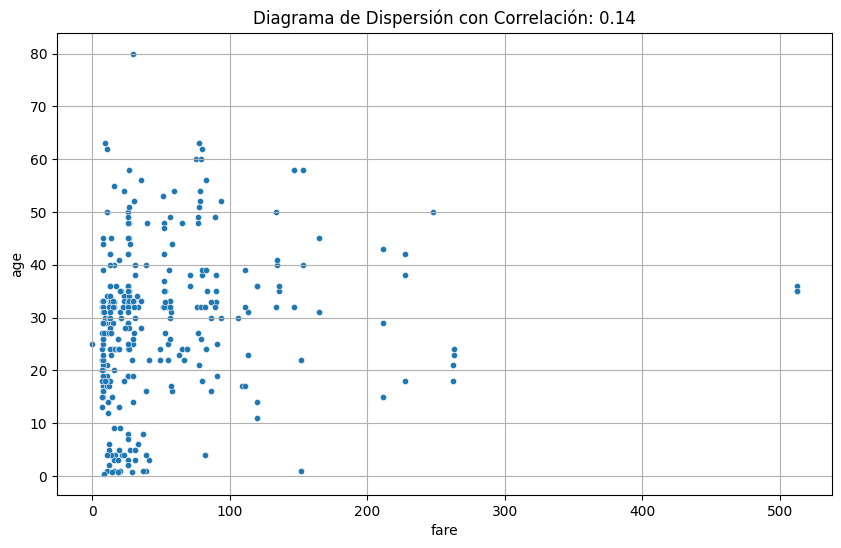

Para alive? no


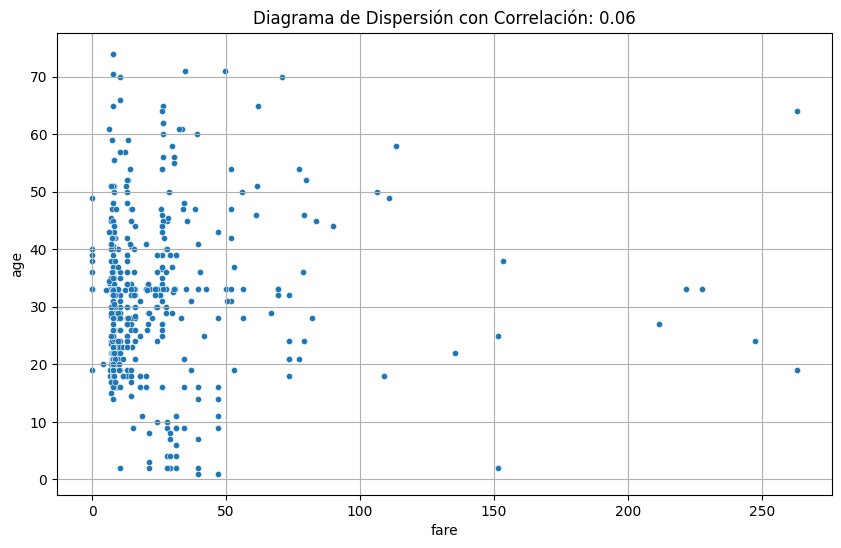

In [75]:
for bin in ['yes','no']:
    df_temp = df_titanic[df_titanic['alive']== bin ]
    print('Para alive?',bin)
    grafico_dispersion_con_correlacion(df_temp,'fare','age', tamano_puntos=20, mostrar_correlacion= True)

* No se ve una correlación entre edad y el precio del billete independientemente de si se salvaron o no
* Esto no quiere decir que entre supervivencia y precio y entre superviviecia y edad no hay cierta relación
* Esas relaciones estarían provocadas por la supervivencia superior en mujeres y niños, y en los pasajeros de primera y segunda clase
* Se podría hacer un chequeo rápido a las medias y, más en profundidad, habría que hacer los test correspondientes
* Lo dejaríamos para el EDA

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

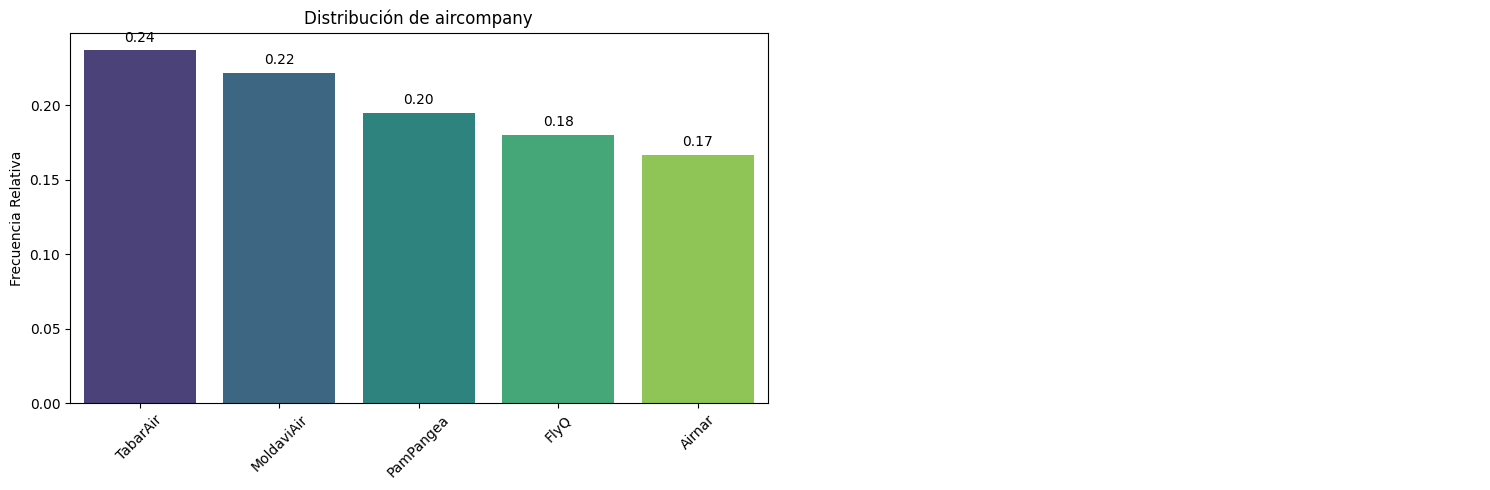

In [76]:
df_viajes = pd.read_csv("./data/dataset_viajes_jun23.csv")
pinta_distribucion_categoricas(df_viajes,["aircompany"], relativa= True, mostrar_valores= True)

(2,)


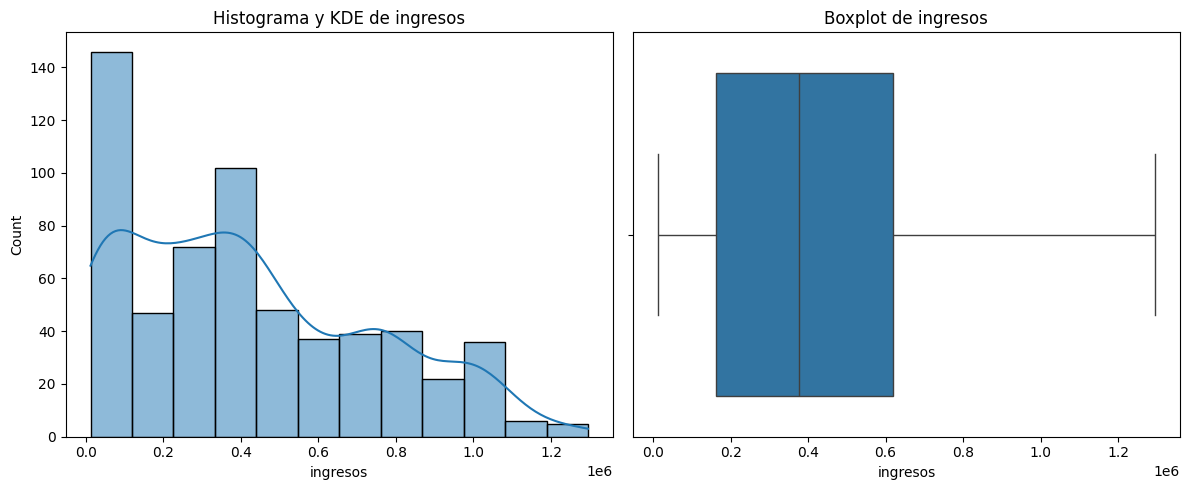

In [77]:
plot_combined_graphs(df_viajes,["ingresos"])

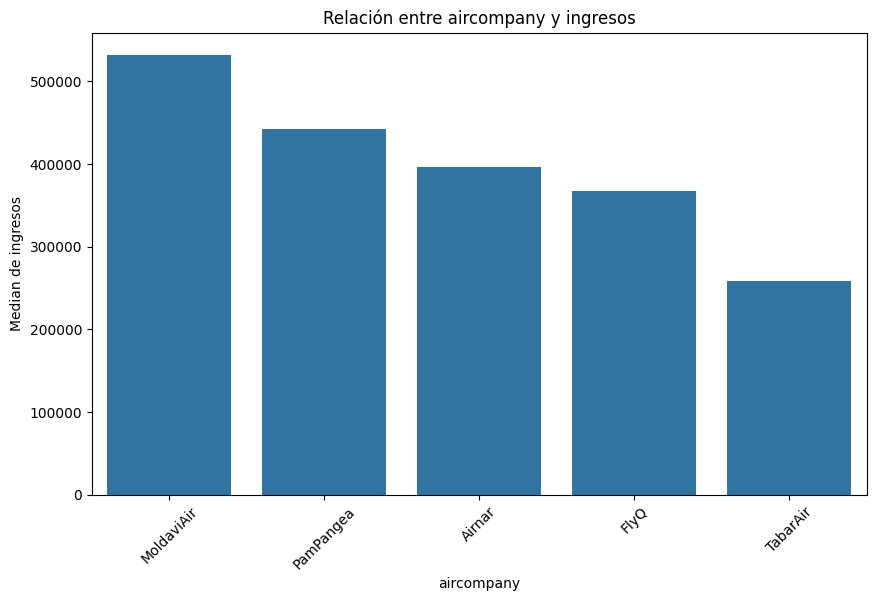

In [78]:
plot_categorical_numerical_relationship(df_viajes, "aircompany","ingresos",measure='median')

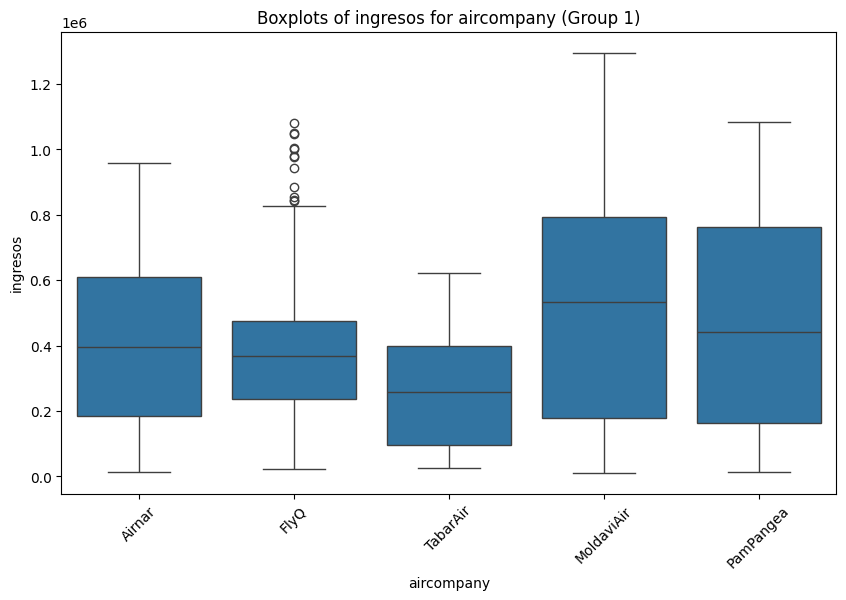

In [79]:
plot_grouped_boxplots(df_viajes,"aircompany","ingresos")

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

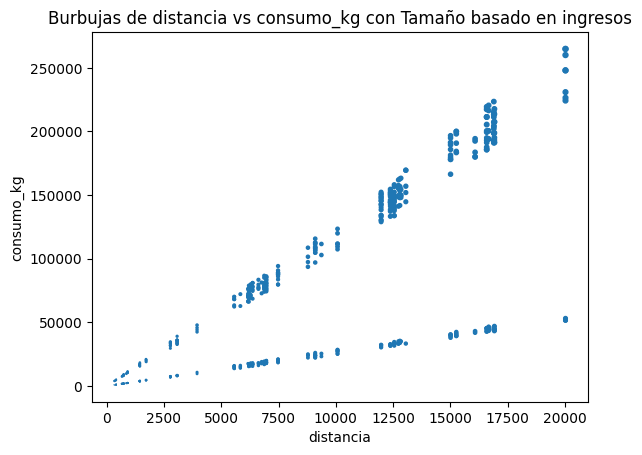

In [80]:
bubble_plot(df_viajes,"distancia","consumo_kg","ingresos", scale = 100000)

* Existen dos curvas de consumo con ingresos parecidos
* Existe una "línea eficiente" de viajes
* Si encontramos sus características podríamos explotarlas para mejorar los resultados de Tabair, por ejemplo
* Tal vez se deba al tipo de avión?

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

(2,)


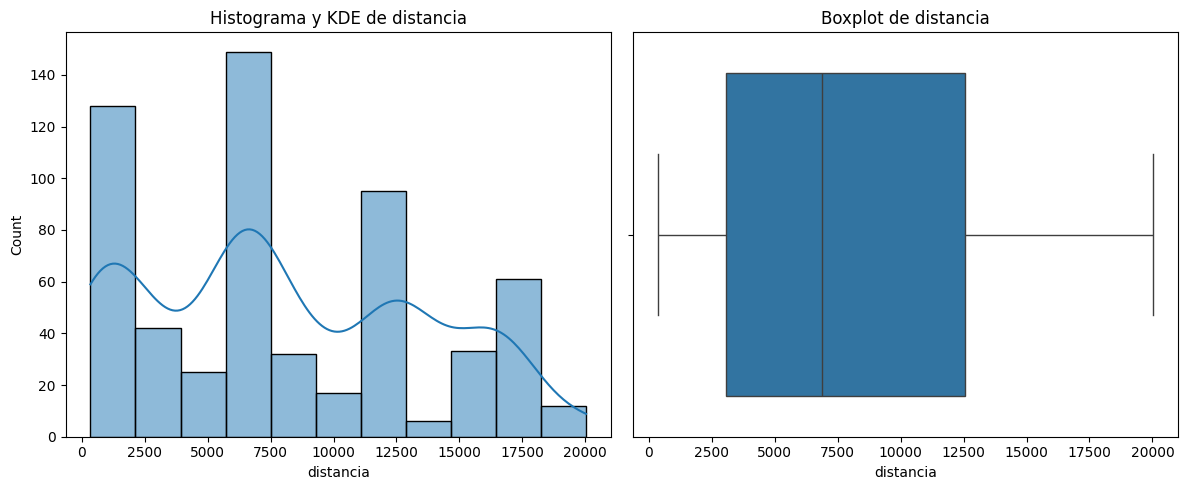

In [81]:
plot_combined_graphs(df_viajes,["distancia"])

In [82]:
df_viajes["cat_vuelo"] = pd.cut(df_viajes["distancia"], bins = [0,5500, 11000,16000, df_viajes.distancia.max()], labels = ["cat1","cat2","cat3","cat4"])

In [85]:
col_directora = "cat_vuelo"
col_1 = "consumo_kg"
col_2 = "distancia"
diccionario_multivariante = {}
for valor in df_viajes[col_directora].unique():
    diccionario_multivariante[valor] = df_viajes.loc[df_viajes[col_directora] == valor,[col_2,col_1]]

Respuesta cat1:


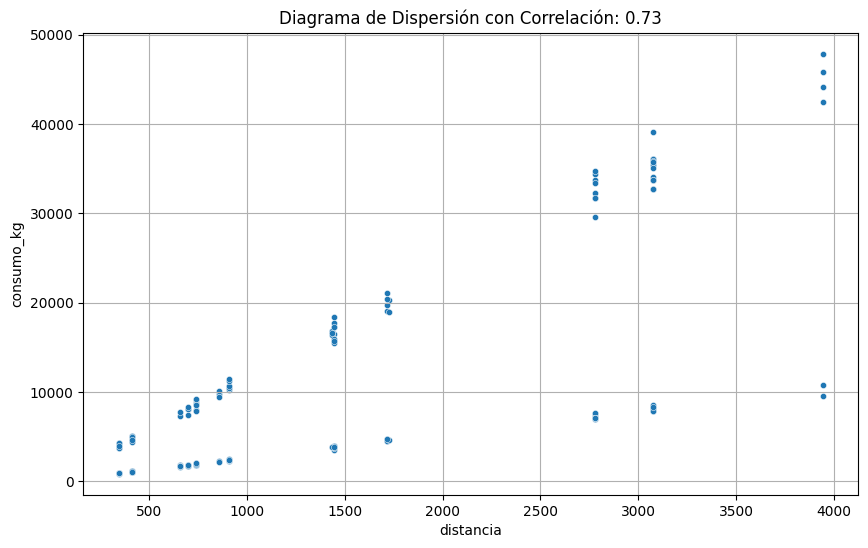

Respuesta cat3:


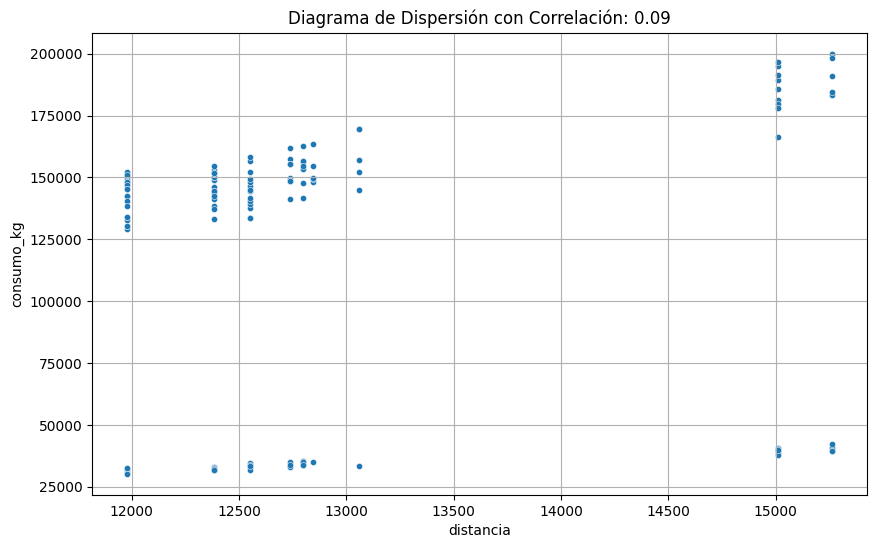

Respuesta cat2:


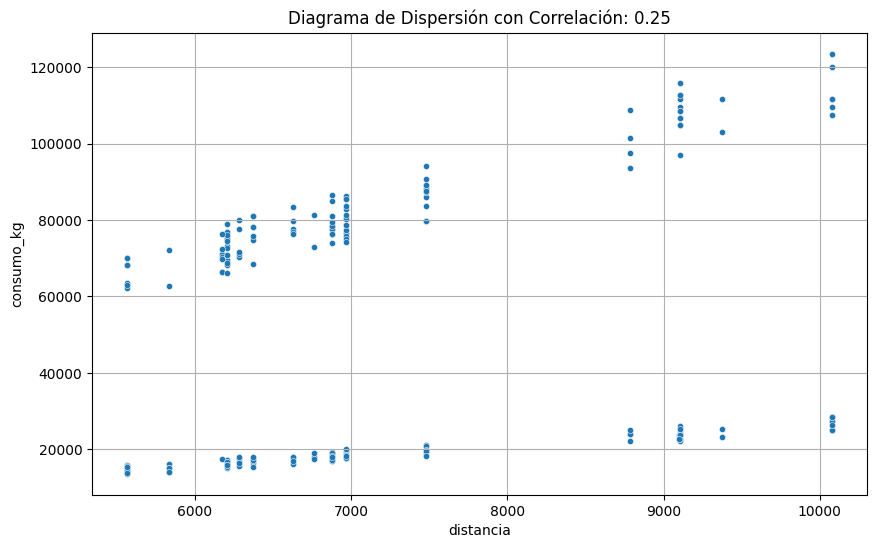

Respuesta cat4:


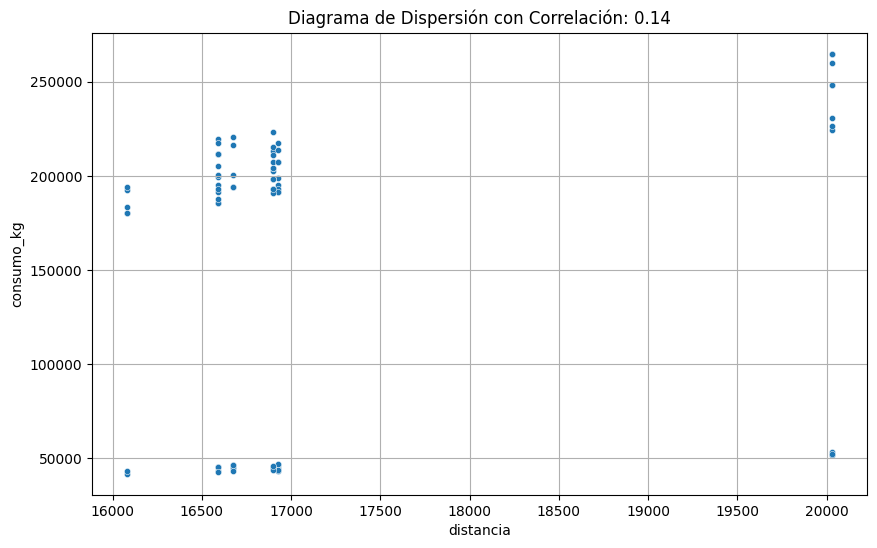

In [86]:
for valor,df_datos in diccionario_multivariante.items():
    print(f"Respuesta {valor}:")
    grafico_dispersion_con_correlacion(df_datos,col_2,col_1, tamano_puntos=20, mostrar_correlacion= True)

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.

In [88]:
df_viajes["ingreso_kg"] = df_viajes["ingresos"]/df_viajes["consumo_kg"]
df_viajes["consumo_km"] = df_viajes["consumo_kg"]/df_viajes["distancia"]

(2, 2)


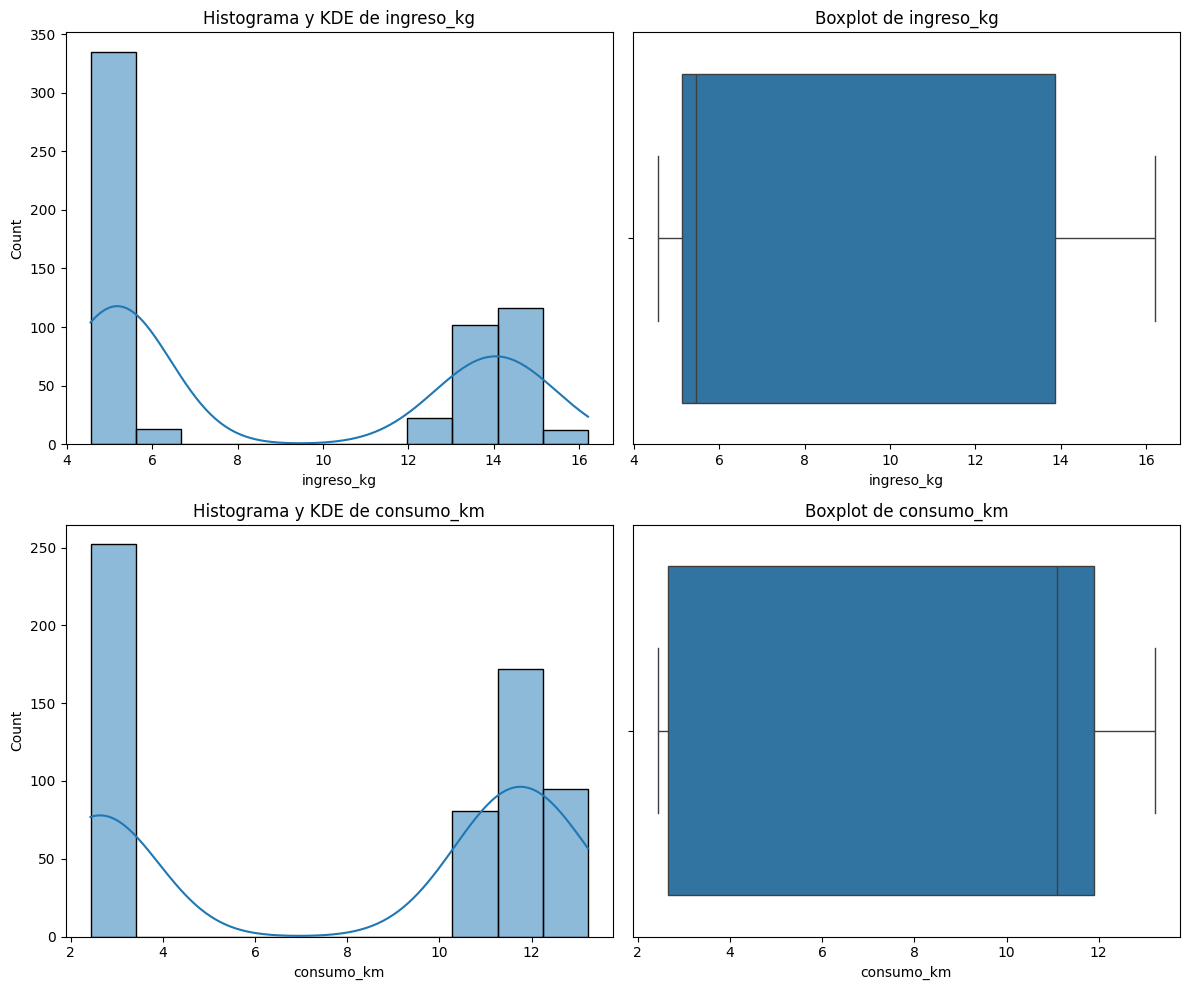

In [89]:
plot_combined_graphs(df_viajes,["ingreso_kg","consumo_km"])

In [90]:
df_viajes["eficiente_ingreso"] = df_viajes.ingreso_kg >= 12
df_viajes["eficiente_consumo"] = df_viajes.consumo_km <= 4
df_viajes["supereficiente"] = (df_viajes["eficiente_ingreso"]) & (df_viajes["eficiente_consumo"])

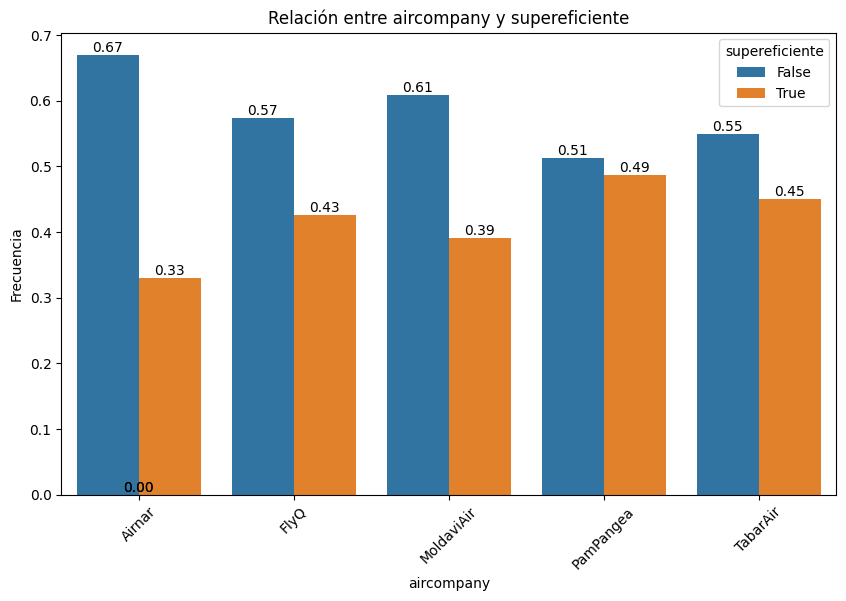

In [91]:
plot_categorical_relationship_fin(df_viajes, "aircompany", "supereficiente", relative_freq = True, show_values = True)

In [94]:
df_viajes.loc[df_viajes.supereficiente==True].groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum,'consumo_km':lambda x: x.mean(),'ingreso_kg':lambda x: x.mean()}).sort_values('consumo_km',ascending=False)

C:\Users\34632\AppData\Local\Temp\ipykernel_20720\3279162274.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_viajes.loc[df_viajes.supereficiente==True].groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum,'consumo_km':lambda x: x.mean(),'ingreso_kg':lambda x: x.mean()}).sort_values('consumo_km',ascending=False)
C:\Users\34632\AppData\Local\Temp\ipykernel_20720\3279162274.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_viajes.loc[df_viajes.supereficiente==True].groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum,'consumo

,ingresos,destino,consumo_kg,distancia,consumo_km,ingreso_kg
aircompany,,,,,,
Airnar,8721813.75,33,6.297195e+05,238838,2.650908,14.042131
TabarAir,13351546.24,64,9.415297e+05,352937,2.645351,14.193517
MoldaviAir,16374674.69,52,1.215658e+06,459579,2.634089,13.785399
FlyQ,10547305.45,46,7.545022e+05,285035,2.633693,14.177075
PamPangea,16723934.00,57,1.225525e+06,463329,2.629302,14.019355


In [95]:
df_viajes.loc[df_viajes.supereficiente==False].groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum,'consumo_km':lambda x: x.mean(),'ingreso_kg':lambda x: x.mean()}).sort_values('consumo_km',ascending=False)

C:\Users\34632\AppData\Local\Temp\ipykernel_20720\1487889576.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_viajes.loc[df_viajes.supereficiente==False].groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum,'consumo_km':lambda x: x.mean(),'ingreso_kg':lambda x: x.mean()}).sort_values('consumo_km',ascending=False)
C:\Users\34632\AppData\Local\Temp\ipykernel_20720\1487889576.py:1: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_viajes.loc[df_viajes.supereficiente==False].groupby("aircompany").agg({"ingresos": sum, "destino": len, "consumo_kg": sum, "distancia": sum,'consu

,ingresos,destino,consumo_kg,distancia,consumo_km,ingreso_kg
aircompany,,,,,,
PamPangea,39250860.70,60,7.726011e+06,643163,11.945597,5.135535
MoldaviAir,56519594.12,81,1.110831e+07,926447,11.897583,5.125515
FlyQ,32827547.42,62,6.432278e+06,541254,11.731156,5.149120
TabarAir,25136450.46,78,4.808733e+06,411037,11.659479,5.233785
Airnar,31807584.07,67,6.102042e+06,520983,11.624889,5.257675


In [97]:
df_viajes[df_viajes.supereficiente==True].groupby("avion").agg({"consumo_km": 'mean', "destino": len, "ingreso_kg": 'mean'})

,consumo_km,destino,ingreso_kg
avion,,,
Airbus A320,2.707539,101,14.554919
Boeing 737,2.591481,151,13.707405


In [98]:
df_viajes[df_viajes.supereficiente==False].groupby("avion").agg({"consumo_km": 'mean', "destino": len, "ingreso_kg": 'mean'})

,consumo_km,destino,ingreso_kg
avion,,,
Airbus A380,12.271451,165,5.125501
Boeing 747,11.318520,183,5.231344


### Eureka, hemos encontrado el motivo de que los viajes sean más eficientes y más baratos. Ahora queda comprobar la gráfica de dispersión para los distintos tipos de avión.

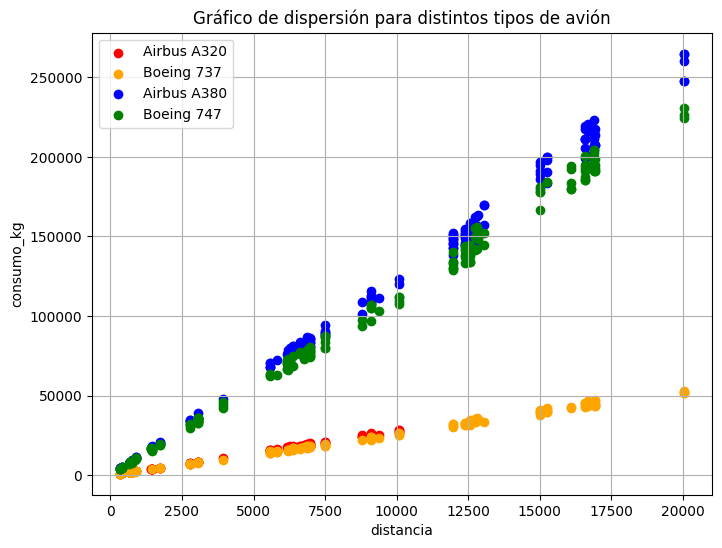

In [100]:
plt.figure(figsize=(8, 6))

# Scatter plot 1 en color rojo
plt.scatter(df_viajes[df_viajes['avion']=='Airbus A320'].distancia, df_viajes[df_viajes['avion']=='Airbus A320'].consumo_kg , color='red', label='Airbus A320')
plt.scatter(df_viajes[df_viajes['avion']=='Boeing 737'].distancia, df_viajes[df_viajes['avion']=='Boeing 737'].consumo_kg , color='orange', label='Boeing 737')
# Scatter plot 2 en color verde

# Scatter plot 1 en color rojo
plt.scatter(df_viajes[df_viajes['avion']=='Airbus A380'].distancia, df_viajes[df_viajes['avion']=='Airbus A380'].consumo_kg , color='blue', label='Airbus A380')
plt.scatter(df_viajes[df_viajes['avion']=='Boeing 747'].distancia, df_viajes[df_viajes['avion']=='Boeing 747'].consumo_kg, color='green', label='Boeing 747')


# Scatter plot 2 en color verde


# Añadir leyenda
plt.legend()

# Añadir etiquetas y título
plt.xlabel('distancia')
plt.ylabel('consumo_kg')
plt.title('Gráfico de dispersión para distintos tipos de avión')

# Mostrar el gráfico
plt.grid(True)
plt.show()

### Los aviones más eficientes son el AirBus A320 y el Boeing 737. Los que menos combustible necesitan para recorrer las mismas distancias.

In [101]:
print('TabarAir')
print((df_viajes.loc[df_viajes['aircompany']=='TabarAir','avion'].value_counts()/len(df_viajes.loc[df_viajes['aircompany']== 'TabarAir','avion']))*100)
print()
print('Airnar')
print((df_viajes.loc[df_viajes['aircompany']=='Airnar','avion'].value_counts()/len(df_viajes.loc[df_viajes['aircompany']== 'Airnar','avion']))*100)
print()
print('MoldaviAir')
print((df_viajes.loc[df_viajes['aircompany']=='MoldaviAir','avion'].value_counts()/len(df_viajes.loc[df_viajes['aircompany']== 'MoldaviAir','avion']))*100)
print()
print('PamPangea')
print((df_viajes.loc[df_viajes['aircompany']=='PamPangea','avion'].value_counts()/len(df_viajes.loc[df_viajes['aircompany']== 'PamPangea','avion']))*100)

TabarAir
avion
Boeing 747     28.873239
Airbus A380    26.056338
Airbus A320    24.647887
Boeing 737     20.422535
Name: count, dtype: float64

Airnar
avion
Boeing 747     38.0
Airbus A380    29.0
Boeing 737     18.0
Airbus A320    15.0
Name: count, dtype: float64

MoldaviAir
avion
Airbus A380    30.827068
Boeing 747     30.075188
Boeing 737     29.323308
Airbus A320     9.774436
Name: count, dtype: float64

PamPangea
avion
Boeing 737     32.478632
Airbus A380    28.205128
Boeing 747     23.076923
Airbus A320    16.239316
Name: count, dtype: float64


In [102]:
print('TabarAir')
print(df_viajes.loc[df_viajes['aircompany']=='TabarAir','avion'].value_counts())
print()
print('Airnar')
print(df_viajes.loc[df_viajes['aircompany']=='Airnar','avion'].value_counts())
print()
print('MoldaviAir')
print(df_viajes.loc[df_viajes['aircompany']=='MoldaviAir','avion'].value_counts())
print()
print('PamPangea')
print(df_viajes.loc[df_viajes['aircompany']=='PamPangea','avion'].value_counts())

TabarAir
avion
Boeing 747     41
Airbus A380    37
Airbus A320    35
Boeing 737     29
Name: count, dtype: int64

Airnar
avion
Boeing 747     38
Airbus A380    29
Boeing 737     18
Airbus A320    15
Name: count, dtype: int64

MoldaviAir
avion
Airbus A380    41
Boeing 747     40
Boeing 737     39
Airbus A320    13
Name: count, dtype: int64

PamPangea
avion
Boeing 737     38
Airbus A380    33
Boeing 747     27
Airbus A320    19
Name: count, dtype: int64


### ¿En general la mayor eficiencía para las compañías depende del tipo de avión que usen más a menudo en sus viajes. Si usan más A320 y 737 serán más eficientes?